In [10]:
!pip install opencv-python
!pip install tensorflow

In [13]:
!pip install imutils
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=8f848f95c08a75a391f9b5a8ed7f4c3907b01f6a1f371826a918257a3acc469b
  Stored in directory: c:\users\sebas\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [18]:
mainPath = "./nuestra_version/"
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [32]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(mainPath + "dataset"))
data = []
labels = []

[INFO] loading images...


In [33]:
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    print(image)

[[[-0.94509804 -0.9764706  -0.85882354]
  [-0.94509804 -0.9764706  -0.85882354]
  [-0.94509804 -0.9764706  -0.85882354]
  ...
  [-0.8509804  -0.90588236 -0.78039217]
  [-0.8509804  -0.90588236 -0.78039217]
  [-0.84313726 -0.8980392  -0.77254903]]

 [[-0.9137255  -0.94509804 -0.827451  ]
  [-0.9137255  -0.94509804 -0.827451  ]
  [-0.9137255  -0.94509804 -0.827451  ]
  ...
  [-0.7647059  -0.79607844 -0.6784314 ]
  [-0.7647059  -0.79607844 -0.6784314 ]
  [-0.75686276 -0.7882353  -0.67058825]]

 [[-0.92156863 -0.9607843  -0.8039216 ]
  [-0.92156863 -0.9607843  -0.8039216 ]
  [-0.92156863 -0.9607843  -0.8039216 ]
  ...
  [-0.88235295 -0.8980392  -0.7882353 ]
  [-0.8666667  -0.88235295 -0.77254903]
  [-0.85882354 -0.8745098  -0.7647059 ]]

 ...

 [[ 0.3803922  -0.9607843  -0.36470586]
  [ 0.38823533 -0.9607843  -0.3960784 ]
  [ 0.3803922  -0.9607843  -0.42745095]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [

  [-0.8509804  -0.827451   -0.7882353 ]]]
[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.8117647   1.          1.        ]
  [ 0.85882354  1.          1.        ]
  [ 0.8901961   0.96862745  0.9764706 ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.94509804 -0.05098039  0.11372554]
  [ 0.8980392  -0.01960784  0.12941182]
  [ 0.92941177  0.22352946  0.3176471 ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 1.         -0.3333333  -0.17647058]
  [ 1.         -0.32549018 -0.18431371]
  [ 1.         -0.3098039  -0.17647058]]

 ...

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 1.          0.8980392   0.8352941 ]
  [ 0.9607843   0.85882354  0.8117647 ]
  

  [-0.31764704 -0.41176468 -0.05098039]]]
[[[0.96862745 1.         1.        ]
  [0.96862745 1.         1.        ]
  [0.9764706  1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.96862745 1.         1.        ]
  [0.96862745 1.         1.        ]
  [0.9764706  1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.96862745 1.         1.        ]
  [0.96862745 1.         1.        ]
  [0.9764706  1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.     

  [ 0.11372554 -0.4352941  -0.35686272]]]
[[[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]]

 ...

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.9843137  -1.         -0.99215686]
  [-0.9843137  -1.         -0.99215686]
  

  [1.         1.         1.        ]]]
[[[0.9764706  1.         0.9843137 ]
  [0.99215686 1.         1.        ]
  [1.         1.         0.9607843 ]
  ...
  [1.         1.         0.96862745]
  [1.         1.         0.9843137 ]
  [0.99215686 1.         1.        ]]

 [[0.99215686 1.         0.9843137 ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.9843137  0.9529412 ]
  ...
  [1.         1.         0.96862745]
  [1.         1.         0.9843137 ]
  [0.99215686 1.         1.        ]]

 [[1.         1.         1.        ]
  [0.9843137  0.9843137  1.        ]
  [0.99215686 0.9843137  0.9529412 ]
  ...
  [1.         1.         0.96862745]
  [1.         1.         0.9843137 ]
  [0.99215686 1.         1.        ]]

 ...

 [[1.         1.         0.9843137 ]
  [1.         0.99215686 1.        ]
  [0.9764706  0.9764706  0.99215686]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9843137  1.         0.99215686

  [ 1.          0.99215686  1.        ]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[[ 0.11372554  0.00392163  0.00392163]
  [ 0.07450986 -0.05098039 -0.04313725]
  [ 0.01176476 -0.11372548 -0.11372548]
  ...
  [ 0.19215691  0.12941182  0.10588241]
  [ 0.18431377  0.12156868  0.09803927]
  [ 0.17647064  0.11372554  0.09019613]]

 [[ 0.11372554  0.00392163  0.00392163]
  [ 0.09803927 -0.02745098 -0.01960784]
  [ 0.02745104 -0.09803921 -0.09803921]
  ...
  [ 0.1686275   0.10588241  0.082353  ]
  [ 0.1686275   0.1058

[[[ 0.9764706   1.          0.8901961 ]
  [ 0.99215686  1.          0.9843137 ]
  [ 0.99215686  1.          0.9843137 ]
  ...
  [ 1.          0.9843137   0.99215686]
  [ 1.          0.9764706   0.99215686]
  [ 0.96862745  1.          0.9843137 ]]

 [[ 0.96862745  0.96862745  0.9529412 ]
  [ 0.96862745  0.94509804  1.        ]
  [ 1.          0.9843137   1.        ]
  ...
  [ 1.          0.9843137   1.        ]
  [ 1.          0.9764706   1.        ]
  [ 0.94509804  1.          1.        ]]

 [[ 1.          0.99215686  1.        ]
  [ 1.          0.96862745  1.        ]
  [ 1.          0.94509804  1.        ]
  ...
  [ 1.          0.92941177  0.92156863]
  [ 1.          0.9137255   0.9137255 ]
  [ 0.9764706   0.9843137   0.9372549 ]]

 ...

 [[ 1.          1.          0.96862745]
  [ 1.          1.          1.        ]
  [ 0.9843137   1.          0.99215686]
  ...
  [-0.96862745 -0.99215686 -0.78039217]
  [-0.96862745 -0.9843137  -0.81960785]
  [ 0.92156863  0.9137255   0.9607843 ]]

 [

  [ 0.5921569   0.6         0.75686276]]]
[[[ 1.          1.          0.9843137 ]
  [ 0.99215686  1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.41176474  0.27058828  0.082353  ]
  [ 0.38823533  0.254902    0.05098045]
  [ 0.49803925  0.34901965  0.09803927]]

 [[ 1.          1.          0.9843137 ]
  [ 0.99215686  1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.62352943  0.5058824   0.26274514]
  [ 0.52156866  0.39607847  0.12941182]
  [ 0.49803925  0.3803922   0.05882359]]

 [[ 1.          1.          0.9843137 ]
  [ 0.99215686  1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.39607847  0.27843142  0.05098045]
  [ 0.37254906  0.254902   -0.00392157]
  [ 0.39607847  0.27058828  0.00392163]]

 ...

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [-0.18431371 -0.1607843  -0.02745098]
  [-0.14509803 -0.10588235  0.04313731]
  

[[[0.6862745  0.67058825 0.75686276]
  [0.6862745  0.67058825 0.75686276]
  [0.69411767 0.6784314  0.7647059 ]
  ...
  [0.84313726 0.8352941  0.88235295]
  [0.88235295 0.8745098  0.92156863]
  [0.81960785 0.8117647  0.8745098 ]]

 [[0.75686276 0.7411765  0.827451  ]
  [0.73333335 0.7176471  0.8039216 ]
  [0.69411767 0.6784314  0.7647059 ]
  ...
  [0.7647059  0.75686276 0.8039216 ]
  [0.827451   0.81960785 0.8666667 ]
  [0.79607844 0.7882353  0.8509804 ]]

 [[0.827451   0.8117647  0.8980392 ]
  [0.78039217 0.7647059  0.8509804 ]
  [0.7019608  0.6862745  0.77254903]
  ...
  [0.6627451  0.654902   0.7019608 ]
  [0.88235295 0.8745098  0.92156863]
  [0.81960785 0.8117647  0.8745098 ]]

 ...

 [[0.8666667  0.77254903 0.8666667 ]
  [0.654902   0.56078434 0.6392157 ]
  [0.43529415 0.33333337 0.4039216 ]
  ...
  [0.85882354 0.8666667  0.90588236]
  [0.85882354 0.8666667  0.90588236]
  [0.85882354 0.8666667  0.90588236]]

 [[0.77254903 0.69411767 0.78039217]
  [0.88235295 0.7882353  0.8666667 ]


  [-0.90588236 -0.9372549  -0.94509804]]]
[[[0.96862745 0.96862745 0.96862745]
  [0.9764706  0.9764706  0.9764706 ]
  [0.9843137  0.9843137  0.9843137 ]
  ...
  [1.         1.         1.        ]
  [0.9372549  0.9372549  0.9372549 ]
  [0.8745098  0.8745098  0.8745098 ]]

 [[0.9843137  0.9843137  0.9843137 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.9843137  0.9843137  0.9843137 ]
  ...
  [1.         1.         1.        ]
  [0.9843137  0.9843137  0.9843137 ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.9843137  0.9843137  0.9843137 ]]

 [[1.         1.         1.     

[[[ 0.47450984  0.05882359 -0.05098039]
  [ 0.35686278 -0.05098039 -0.1607843 ]
  [ 0.32549024 -0.06666666 -0.15294117]
  ...
  [ 0.20784318 -0.09803921 -0.0745098 ]
  [ 0.20000005 -0.12156862 -0.0745098 ]
  [ 0.26274514 -0.05882353 -0.01176471]]

 [[ 0.45882356  0.00392163 -0.10588235]
  [ 0.37254906 -0.04313725 -0.15294117]
  [ 0.30980396 -0.06666666 -0.1607843 ]
  ...
  [ 0.15294123 -0.15294117 -0.12941176]
  [ 0.20784318 -0.10588235 -0.09803921]
  [ 0.22352946 -0.09019607 -0.08235294]]

 [[ 0.5686275   0.03529418 -0.06666666]
  [ 0.5529412   0.06666672 -0.03529412]
  [ 0.47450984  0.05098045 -0.02745098]
  ...
  [ 0.41176474  0.12156868  0.05882359]
  [ 0.47450984  0.17647064  0.07450986]
  [ 0.49803925  0.19215691  0.07450986]]

 ...

 [[-0.5372549  -0.7411765  -0.38823527]
  [-0.5529412  -0.75686276 -0.40392154]
  [-0.56078434 -0.7647059  -0.41176468]
  ...
  [-0.5058824  -0.77254903 -0.4823529 ]
  [-0.4980392  -0.7647059  -0.47450978]
  [-0.52156866 -0.7647059  -0.4980392 ]]

 [

  [ 0.7882353   0.6156863   0.32549024]]]
[[[ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  ...
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]]

 [[ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  ...
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]]

 [[ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  ...
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]
  [ 0.3411765   0.48235297  0.48235297]]

 ...

 [[-0.4980392  -0.27058822  0.18431377]
  [-0.54509807 -0.31764704  0.15294123]
  [-0.5137255  -0.2862745   0.18431377]
  ...
  [ 0.254902    0.38823533  0.32549024]
  [ 0.23921573  0.38823533  0.35686278]
  

  [-0.6862745  -0.7411765  -0.88235295]]]
[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.7882353   0.70980394  0.6392157 ]
  [ 0.7882353   0.70980394  0.6392157 ]
  [ 0.7882353   0.70980394  0.6392157 ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.79607844  0.7176471   0.64705884]
  [ 0.79607844  0.7176471   0.64705884]
  [ 0.79607844  0.7176471   0.64705884]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 0.99215686  1.          1.        ]
  ...
  [ 0.79607844  0.70980394  0.6627451 ]
  [ 0.79607844  0.70980394  0.6627451 ]
  [ 0.79607844  0.70980394  0.6627451 ]]

 ...

 [[ 1.          0.99215686  1.        ]
  [ 0.9764706   1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [-0.58431375 -0.9764706  -0.90588236]
  [-0.5921569  -0.9764706  -0.92941177]
  

  [-1.         -0.9843137  -1.        ]]]
[[[ 1.          0.96862745  0.9529412 ]
  [ 0.54509807  0.94509804  1.        ]
  [-0.00392157  0.6156863   0.8509804 ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 1.          0.9607843   0.94509804]
  [ 0.5764706   0.9764706   1.        ]
  [-0.02745098  0.5921569   0.827451  ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 1.          0.9529412   0.9529412 ]
  [ 0.56078434  0.9607843   1.        ]
  [-0.01960784  0.5764706   0.827451  ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 ...

 [[ 1.          0.99215686  1.        ]
  [ 0.5529412   0.56078434  0.6       ]
  [-0.67058825 -0.67058825 -0.60784316]
  ...
  [-0.5137255  -0.54509807 -0.5372549 ]
  [ 0.9372549   0.90588236  0.9137255 ]
  

  [-0.4352941  -0.4352941  -0.16862744]]]
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.     

  [-1.         -0.99215686 -1.        ]]]
[[[ 1.          0.9529412   0.81960785]
  [ 1.          0.9529412   0.84313726]
  [ 0.75686276  0.7411765   0.64705884]
  ...
  [ 0.81960785  0.85882354  0.8117647 ]
  [ 0.9529412   0.9764706   0.92156863]
  [ 0.92156863  0.92941177  0.8666667 ]]

 [[ 1.          0.9137255   0.8666667 ]
  [ 0.84313726  0.78039217  0.75686276]
  [ 0.8901961   0.85882354  0.8352941 ]
  ...
  [ 0.8901961   0.90588236  0.88235295]
  [ 0.9529412   0.9764706   0.92156863]
  [ 0.96862745  0.9764706   0.9137255 ]]

 [[ 0.9607843   0.8745098   0.92156863]
  [ 1.          0.9764706   1.        ]
  [ 0.9137255   0.8745098   0.92941177]
  ...
  [ 0.92941177  0.94509804  0.92156863]
  [ 0.8666667   0.8745098   0.8352941 ]
  [ 0.90588236  0.8980392   0.85882354]]

 ...

 [[ 0.85882354  0.8666667   0.8980392 ]
  [-0.49019605 -0.5294118  -0.47450978]
  [-0.81960785 -0.8980392  -0.8117647 ]
  ...
  [-1.         -1.         -1.        ]
  [-0.5372549  -0.5529412  -0.5294118 ]
  

[[[ 0.9372549   1.          0.9137255 ]
  [ 0.8117647   0.8745098   0.7882353 ]
  [ 0.92156863  0.96862745  0.8901961 ]
  ...
  [ 0.96862745  0.9607843   1.        ]
  [ 0.92941177  0.90588236  0.9607843 ]
  [ 1.          0.9764706   1.        ]]

 [[ 0.88235295  0.9372549   0.8745098 ]
  [ 0.9529412   1.          0.94509804]
  [ 0.9764706   1.          0.9607843 ]
  ...
  [ 0.96862745  0.9607843   1.        ]
  [ 0.9529412   0.92941177  0.9843137 ]
  [ 0.78039217  0.7411765   0.79607844]]

 [[ 0.84313726  0.8901961   0.85882354]
  [ 0.8980392   0.94509804  0.9137255 ]
  [ 0.9529412   0.99215686  0.9607843 ]
  ...
  [ 0.96862745  0.96862745  0.9843137 ]
  [ 1.          0.99215686  1.        ]
  [ 0.9843137   0.94509804  0.9764706 ]]

 ...

 [[ 0.84313726  0.9529412   0.9607843 ]
  [ 0.8509804   0.92941177  0.9372549 ]
  [ 0.90588236  0.96862745  0.9843137 ]
  ...
  [-0.7254902  -0.7019608  -0.58431375]
  [-0.78039217 -0.7647059  -0.64705884]
  [-0.6156863  -0.6        -0.4823529 ]]

 [

[[[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 ...

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]
[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  

  [-1. -1. -1.]]]
[[[-0.5921569  -0.8509804  -0.9843137 ]
  [-0.6        -0.84313726 -0.9843137 ]
  [-0.6        -0.84313726 -0.9843137 ]
  ...
  [-0.8352941  -0.9137255  -0.92156863]
  [-0.8352941  -0.9137255  -0.92156863]
  [-0.8352941  -0.9137255  -0.92156863]]

 [[-0.6        -0.84313726 -0.9843137 ]
  [-0.5921569  -0.8352941  -0.9764706 ]
  [-0.5921569  -0.8352941  -0.9764706 ]
  ...
  [-0.8352941  -0.9137255  -0.92156863]
  [-0.8352941  -0.9137255  -0.92156863]
  [-0.8352941  -0.9137255  -0.92156863]]

 [[-0.5921569  -0.8352941  -0.9764706 ]
  [-0.5921569  -0.84313726 -0.9607843 ]
  [-0.5921569  -0.84313726 -0.9607843 ]
  ...
  [-0.827451   -0.92156863 -0.92156863]
  [-0.827451   -0.92156863 -0.92156863]
  [-0.827451   -0.92156863 -0.92156863]]

 ...

 [[ 0.3411765   0.23921573  0.1686275 ]
  [ 0.34901965  0.24705887  0.17647064]
  [ 0.34901965  0.24705887  0.17647064]
  ...
  [-0.62352943 -0.5921569  -0.29411763]
  [-0.62352943 -0.5921569  -0.29411763]
  [-0.6313726  -0.6       

  [ 0.81960785 -0.654902   -0.8509804 ]]]
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         0.9843137 ]
  [0.9607843  0.9607843  0.94509804]
  [1.         1.         0.9843137 ]]

 [[1.         1.         1.     

  [ 0.427451    0.26274514 -0.10588235]]]
[[[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 ...

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]
[[[ 0.9607843   0.8039216   0.60784316]
  [ 0.96862745  0.8117647   0.6156863 ]
  [ 0.9764706   0.81960785  0.62352943]
  ...
  [ 0.9607843   0.8352941   0.6313726 ]
  [ 0.9607843   0.8352941   0.6313726 ]
  [ 0.9607843   0.8352941   0.6313726 ]]

 [[ 0.9607843   0.8039216   0.60784316]
  [ 0.96862745  0.8117647   0.6156863 ]


[[[ 0.90588236  0.85882354  0.85882354]
  [ 0.88235295  0.88235295  0.88235295]
  [ 0.9372549   0.9764706   1.        ]
  ...
  [ 0.90588236  0.9372549   0.5372549 ]
  [ 0.78039217  0.8117647   0.41960788]
  [ 0.77254903  0.6784314   0.22352946]]

 [[ 0.90588236  0.8745098   0.88235295]
  [ 0.79607844  0.78039217  0.8039216 ]
  [ 0.84313726  0.8745098   0.88235295]
  ...
  [ 0.8901961   0.90588236  0.52156866]
  [ 0.99215686  1.          0.69411767]
  [ 0.84313726  0.78039217  0.41960788]]

 [[ 0.92941177  0.9137255   0.9529412 ]
  [ 0.7647059   0.7490196   0.77254903]
  [ 0.8117647   0.8117647   0.827451  ]
  ...
  [ 0.8352941   0.75686276  0.37254906]
  [ 1.          1.          0.70980394]
  [ 0.78039217  0.7254902   0.3803922 ]]

 ...

 [[-0.85882354 -0.8509804  -0.8117647 ]
  [-0.75686276 -0.77254903 -0.7490196 ]
  [-0.92156863 -1.         -1.        ]
  ...
  [ 0.88235295  0.8980392   0.8745098 ]
  [ 1.          1.          1.        ]
  [ 0.9372549   0.94509804  0.9843137 ]]

 [

  [-0.27058822 -0.75686276 -0.67058825]]]
[[[-0.5529412  -0.7411765   0.01176476]
  [-0.56078434 -0.7490196  -0.01176471]
  [-0.5764706  -0.7647059  -0.02745098]
  ...
  [-0.5529412  -0.69411767  0.09019613]
  [-0.54509807 -0.6862745   0.09803927]
  [-0.5529412  -0.69411767  0.09019613]]

 [[-0.5529412  -0.7411765  -0.00392157]
  [-0.56078434 -0.7490196  -0.01176471]
  [-0.5686275  -0.75686276 -0.01960784]
  ...
  [-0.54509807 -0.6862745   0.09803927]
  [-0.5372549  -0.6784314   0.10588241]
  [-0.54509807 -0.6862745   0.09803927]]

 [[-0.56078434 -0.7490196  -0.01176471]
  [-0.5529412  -0.7411765  -0.00392157]
  [-0.56078434 -0.7490196   0.00392163]
  ...
  [-0.54509807 -0.6862745   0.09803927]
  [-0.5372549  -0.6784314   0.10588241]
  [-0.54509807 -0.6862745   0.09803927]]

 ...

 [[ 0.26274514 -0.12941176  0.06666672]
  [ 0.28627455 -0.12941176 -0.06666666]
  [ 0.27058828 -0.12941176 -0.01176471]
  ...
  [-0.46666664 -0.5921569   0.24705887]
  [-0.46666664 -0.58431375  0.23921573]
  

  [-0.12156862 -0.03529412  0.12156868]]]
[[[-0.90588236 -0.8980392  -0.94509804]
  [-0.88235295 -0.8666667  -0.90588236]
  [-0.90588236 -0.8901961  -0.9137255 ]
  ...
  [ 0.54509807  0.03529418 -0.1372549 ]
  [ 0.5294118   0.01176476 -0.11372548]
  [ 0.5372549   0.0196079  -0.10588235]]

 [[-0.8980392  -0.88235295 -0.8901961 ]
  [-0.90588236 -0.8901961  -0.8980392 ]
  [-0.8745098  -0.8745098  -0.8745098 ]
  ...
  [ 0.52156866  0.01176476 -0.1607843 ]
  [ 0.56078434  0.03529418 -0.09803921]
  [ 0.52156866 -0.00392157 -0.15294117]]

 [[-0.8980392  -0.8901961  -0.92941177]
  [-0.9137255  -0.8980392  -0.92156863]
  [-0.88235295 -0.8745098  -0.9137255 ]
  ...
  [ 0.47450984 -0.04313725 -0.21568626]
  [ 0.5058824  -0.01960784 -0.15294117]
  [ 0.49803925 -0.02745098 -0.1607843 ]]

 ...

 [[ 0.05098045 -0.52156866 -0.79607844]
  [ 0.12941182 -0.46666664 -0.7176471 ]
  [ 0.18431377 -0.38823527 -0.64705884]
  ...
  [-0.34117645 -0.26274508 -0.25490195]
  [-0.8901961  -0.8117647  -0.81960785]
  

[[[-0.85882354 -0.9372549  -0.9529412 ]
  [-0.8745098  -0.9607843  -0.9764706 ]
  [-0.8745098  -0.9529412  -0.96862745]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.88235295 -0.94509804 -0.96862745]
  [-0.92156863 -0.9843137  -1.        ]
  [-0.8509804  -0.90588236 -0.9529412 ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.81960785 -0.85882354 -0.88235295]
  [-0.94509804 -0.9843137  -1.        ]
  [-0.8666667  -0.92941177 -0.9529412 ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-0.79607844 -0.85882354 -0.8745098 ]
  [-0.84313726 -0.90588236 -0.92156863]
  [-0.7882353  -0.8509804  -0.8666667 ]
  ...
  [-0.7647059  -0.8509804  -0.8666667 ]
  [-0.9529412  -0.99215686 -1.        ]
  [-0.9607843  -1.         -1.        ]]

 [

  [-0.24705881 -0.27843136 -0.372549  ]]]
[[[-0.90588236 -0.90588236 -0.90588236]
  [-0.92156863 -0.92156863 -0.92156863]
  [-0.9137255  -0.92156863 -0.9372549 ]
  ...
  [-0.5294118  -0.6627451  -0.7882353 ]
  [-0.5294118  -0.6627451  -0.7882353 ]
  [-0.54509807 -0.67058825 -0.7882353 ]]

 [[-0.9137255  -0.9529412  -0.9764706 ]
  [-0.8980392  -0.9372549  -0.9607843 ]
  [-0.8745098  -0.9372549  -0.9529412 ]
  ...
  [-0.54509807 -0.69411767 -0.827451  ]
  [-0.5137255  -0.6627451  -0.79607844]
  [-0.5764706  -0.70980394 -0.8352941 ]]

 [[-0.8666667  -0.9529412  -0.96862745]
  [-0.8666667  -0.9529412  -0.96862745]
  [-0.8509804  -0.92941177 -0.94509804]
  ...
  [-0.5529412  -0.7176471  -0.8666667 ]
  [-0.5686275  -0.7176471  -0.8509804 ]
  [-0.6        -0.73333335 -0.85882354]]

 ...

 [[-0.827451   -0.8352941  -0.7882353 ]
  [-0.8509804  -0.85882354 -0.8117647 ]
  [-0.84313726 -0.8509804  -0.8039216 ]
  ...
  [-0.8039216  -1.         -0.9764706 ]
  [-0.77254903 -1.         -0.9843137 ]
  

  [-0.4980392  -0.12941176 -0.00392157]]]
[[[ 0.37254906  0.4666667   0.35686278]
  [ 0.3803922   0.4666667   0.35686278]
  [ 0.37254906  0.45882356  0.34901965]
  ...
  [ 0.14509809  0.16078436  0.07450986]
  [ 0.15294123  0.1686275   0.082353  ]
  [ 0.13725495  0.15294123  0.06666672]]

 [[ 0.37254906  0.45098042  0.36470592]
  [ 0.38823533  0.45098042  0.36470592]
  [ 0.4039216   0.4666667   0.3803922 ]
  ...
  [ 0.15294123  0.15294123  0.07450986]
  [ 0.13725495  0.15294123  0.06666672]
  [ 0.12156868  0.14509809  0.05882359]]

 [[ 0.39607847  0.45882356  0.37254906]
  [ 0.39607847  0.45882356  0.37254906]
  [ 0.4039216   0.45098042  0.37254906]
  ...
  [ 0.13725495  0.14509809  0.082353  ]
  [ 0.13725495  0.14509809  0.082353  ]
  [ 0.13725495  0.15294123  0.06666672]]

 ...

 [[-0.827451   -0.827451   -0.827451  ]
  [-0.8039216  -0.8039216  -0.8039216 ]
  [-0.827451   -0.827451   -0.827451  ]
  ...
  [-0.9529412  -0.94509804 -0.9843137 ]
  [-0.96862745 -0.96862745 -0.9843137 ]
  

  [ 0.52156866  0.04313731 -0.09803921]]]
[[[ 0.13725495  0.15294123  0.14509809]
  [ 0.19215691  0.2313726   0.18431377]
  [ 0.30980396  0.30980396  0.32549024]
  ...
  [ 0.43529415  0.41176474  0.35686278]
  [ 0.39607847  0.38823533  0.37254906]
  [ 0.32549024  0.30196083  0.26274514]]

 [[ 0.12156868  0.13725495  0.12941182]
  [ 0.20000005  0.21568632  0.20784318]
  [ 0.37254906  0.37254906  0.38823533]
  ...
  [ 0.60784316  0.58431375  0.54509807]
  [ 0.54509807  0.5294118   0.5372549 ]
  [ 0.5294118   0.49803925  0.47450984]]

 [[ 0.11372554  0.12941182  0.10588241]
  [ 0.14509809  0.15294123  0.11372554]
  [ 0.33333337  0.33333337  0.33333337]
  ...
  [ 0.7411765   0.7176471   0.6784314 ]
  [ 0.69411767  0.6627451   0.6392157 ]
  [ 0.64705884  0.62352943  0.58431375]]

 ...

 [[-0.17647058 -0.1372549  -0.11372548]
  [-0.12941176 -0.10588235 -0.03529412]
  [-0.15294117 -0.12941176 -0.09019607]
  ...
  [-0.19999999 -0.12941176 -0.16862744]
  [ 0.13725495  0.1686275   0.17647064]
  

  [ 0.9372549   0.73333335  0.5372549 ]]]
[[[-0.8901961  -0.9764706  -0.99215686]
  [-0.8666667  -0.9764706  -1.        ]
  [-0.81960785 -0.9764706  -0.9843137 ]
  ...
  [-0.9137255  -0.9764706  -0.99215686]
  [-0.9372549  -0.96862745 -0.99215686]
  [-0.92156863 -0.9843137  -1.        ]]

 [[-0.8901961  -0.9764706  -0.99215686]
  [-0.8509804  -0.96862745 -0.99215686]
  [-0.8117647  -0.9764706  -0.9843137 ]
  ...
  [-0.9764706  -0.9607843  -1.        ]
  [-0.94509804 -0.9764706  -1.        ]
  [-0.9372549  -0.9764706  -1.        ]]

 [[-0.84313726 -0.9607843  -0.9843137 ]
  [-0.84313726 -0.9843137  -1.        ]
  [-0.84313726 -0.9843137  -1.        ]
  ...
  [-0.92941177 -0.96862745 -0.99215686]
  [-0.92156863 -0.9843137  -1.        ]
  [-0.9137255  -0.9764706  -0.99215686]]

 ...

 [[-0.64705884 -0.9137255  -0.92156863]
  [-0.7019608  -0.94509804 -0.9607843 ]
  [-0.7019608  -0.92941177 -0.9607843 ]
  ...
  [-0.8117647  -0.81960785 -0.85882354]
  [-0.827451   -0.8352941  -0.8745098 ]
  

  [0.8901961  0.8901961  0.90588236]]]
[[[ 0.082353    0.58431375  0.9607843 ]
  [ 0.06666672  0.56078434  0.9607843 ]
  [ 0.05882359  0.5529412   0.9529412 ]
  ...
  [ 0.37254906  0.3803922   0.41960788]
  [ 0.37254906  0.3803922   0.41960788]
  [ 0.38823533  0.41176474  0.45098042]]

 [[ 0.082353    0.5764706   0.9764706 ]
  [ 0.05882359  0.5529412   0.9529412 ]
  [ 0.05882359  0.5529412   0.9529412 ]
  ...
  [ 0.36470592  0.38823533  0.427451  ]
  [ 0.37254906  0.39607847  0.43529415]
  [ 0.4039216   0.427451    0.4666667 ]]

 [[ 0.07450986  0.5686275   0.96862745]
  [ 0.04313731  0.56078434  0.96862745]
  [ 0.03529418  0.5529412   0.94509804]
  ...
  [ 0.3803922   0.38823533  0.427451  ]
  [ 0.38823533  0.41176474  0.45098042]
  [ 0.4039216   0.427451    0.4666667 ]]

 ...

 [[ 0.52156866  0.1686275   0.0196079 ]
  [ 0.5137255   0.17647064  0.04313731]
  [ 0.4901961   0.15294123  0.00392163]
  ...
  [-0.03529412 -0.25490195 -0.5686275 ]
  [-0.05098039 -0.24705881 -0.5686275 ]
  [-0

  [-0.15294117 -0.16862744 -0.7490196 ]]]
[[[-0.67058825 -0.64705884 -0.8117647 ]
  [-0.6627451  -0.64705884 -0.81960785]
  [-0.6862745  -0.6627451  -0.827451  ]
  ...
  [-0.8352941  -0.7176471  -0.8980392 ]
  [-0.81960785 -0.69411767 -0.8980392 ]
  [-0.84313726 -0.7176471  -0.92941177]]

 [[-0.6627451  -0.64705884 -0.81960785]
  [-0.6862745  -0.67058825 -0.84313726]
  [-0.6862745  -0.654902   -0.8352941 ]
  ...
  [-0.8352941  -0.69411767 -0.8980392 ]
  [-0.8509804  -0.7254902  -0.92941177]
  [-0.8352941  -0.70980394 -0.92156863]]

 [[-0.7176471  -0.64705884 -0.85882354]
  [-0.6862745  -0.64705884 -0.81960785]
  [-0.70980394 -0.6313726  -0.827451  ]
  ...
  [-0.8352941  -0.70980394 -0.9137255 ]
  [-0.827451   -0.7019608  -0.90588236]
  [-0.8352941  -0.70980394 -0.92156863]]

 ...

 [[-0.75686276 -0.58431375 -0.8901961 ]
  [-0.73333335 -0.6        -0.88235295]
  [-0.7411765  -0.60784316 -0.8901961 ]
  ...
  [-0.4980392  -0.5921569  -0.78039217]
  [-0.6313726  -0.77254903 -0.9607843 ]
  

  [ 0.20784318  0.20000005  0.1686275 ]]]
[[[-0.60784316 -0.8901961  -0.8117647 ]
  [-0.6784314  -0.8901961  -0.8352941 ]
  [-0.6862745  -0.8352941  -0.81960785]
  ...
  [ 0.8901961   0.92156863  0.94509804]
  [ 0.88235295  0.9137255   0.9372549 ]
  [ 0.8509804   0.8901961   0.9137255 ]]

 [[-0.5372549  -0.85882354 -0.7490196 ]
  [-0.5686275  -0.88235295 -0.79607844]
  [-0.7254902  -0.8745098  -0.85882354]
  ...
  [ 0.8666667   0.8901961   0.92941177]
  [ 0.8745098   0.8980392   0.9372549 ]
  [ 0.88235295  0.90588236  0.94509804]]

 [[-0.6        -0.88235295 -0.8039216 ]
  [-0.6        -0.96862745 -0.84313726]
  [-0.4980392  -0.827451   -0.73333335]
  ...
  [ 0.8666667   0.8901961   0.92941177]
  [ 0.8509804   0.8745098   0.9137255 ]
  [ 0.84313726  0.8666667   0.90588236]]

 ...

 [[ 0.0196079  -0.09803921 -0.1372549 ]
  [ 0.01176476 -0.12941176 -0.1607843 ]
  [-0.03529412 -0.17647058 -0.20784312]
  ...
  [-0.8901961  -0.9607843  -0.9529412 ]
  [-0.8980392  -0.94509804 -0.94509804]
  

  [ 0.13725495  0.49803925  0.41960788]]]
[[[-0.3098039  -0.8901961  -0.9764706 ]
  [-0.32549018 -0.8901961  -0.9843137 ]
  [-0.32549018 -0.8901961  -0.9843137 ]
  ...
  [ 0.09019613  0.24705887 -0.1372549 ]
  [-0.09019607  0.09019613 -0.23921567]
  [-0.10588235  0.06666672 -0.23921567]]

 [[-0.32549018 -0.8901961  -0.9843137 ]
  [-0.3333333  -0.8980392  -0.99215686]
  [-0.3333333  -0.9137255  -1.        ]
  ...
  [ 0.05098045  0.21568632 -0.12156862]
  [-0.09803921  0.09019613 -0.19215685]
  [-0.12941176  0.05882359 -0.2235294 ]]

 [[-0.31764704 -0.8980392  -0.9843137 ]
  [-0.32549018 -0.90588236 -0.99215686]
  [-0.3098039  -0.8901961  -0.9764706 ]
  ...
  [ 0.03529418  0.20784318 -0.09019607]
  [-0.06666666  0.12156868 -0.14509803]
  [-0.09803921  0.09019613 -0.1607843 ]]

 ...

 [[-0.04313725 -0.69411767 -0.8039216 ]
  [-0.04313725 -0.69411767 -0.8039216 ]
  [-0.05098039 -0.7019608  -0.8117647 ]
  ...
  [-0.92156863 -0.96862745 -0.96862745]
  [-0.92941177 -0.96862745 -0.99215686]
  

  [-0.19215685 -0.6313726  -0.827451  ]]]
[[[-0.92941177 -0.92941177 -0.92941177]
  [-0.92156863 -0.92156863 -0.92156863]
  [-0.92156863 -0.92156863 -0.92156863]
  ...
  [-0.8117647  -0.8509804  -0.88235295]
  [-0.8039216  -0.8666667  -0.8901961 ]
  [-0.8509804  -0.8901961  -0.92156863]]

 [[-0.92156863 -0.92156863 -0.92156863]
  [-0.9137255  -0.9137255  -0.9137255 ]
  [-0.9137255  -0.9137255  -0.9137255 ]
  ...
  [-0.8352941  -0.85882354 -0.8980392 ]
  [-0.827451   -0.8666667  -0.8980392 ]
  [-0.84313726 -0.88235295 -0.9137255 ]]

 [[-0.9137255  -0.9137255  -0.9137255 ]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92156863 -0.92156863 -0.92156863]
  ...
  [-0.8509804  -0.8901961  -0.92156863]
  [-0.8509804  -0.8901961  -0.92156863]
  [-0.85882354 -0.88235295 -0.92156863]]

 ...

 [[-0.64705884 -0.64705884 -0.64705884]
  [-0.67058825 -0.67058825 -0.67058825]
  [-0.7019608  -0.7019608  -0.7019608 ]
  ...
  [-0.6        -0.6392157  -0.6627451 ]
  [-0.6392157  -0.64705884 -0.6862745 ]
  

  [-0.52156866 -0.62352943 -0.18431371]]]
[[[-0.38823527 -0.3960784  -0.6392157 ]
  [-0.45098037 -0.45098037 -0.7176471 ]
  [-0.47450978 -0.5058824  -0.79607844]
  ...
  [-0.23137254 -0.27058822 -0.7019608 ]
  [-0.24705881 -0.2862745  -0.7254902 ]
  [-0.24705881 -0.30196077 -0.70980394]]

 [[-0.36470586 -0.38823527 -0.6313726 ]
  [-0.4352941  -0.4588235  -0.7176471 ]
  [-0.4588235  -0.49019605 -0.78039217]
  ...
  [-0.29411763 -0.32549018 -0.7019608 ]
  [-0.3098039  -0.34117645 -0.7176471 ]
  [-0.3098039  -0.36470586 -0.7254902 ]]

 [[-0.38039213 -0.40392154 -0.64705884]
  [-0.45098037 -0.47450978 -0.7176471 ]
  [-0.46666664 -0.5058824  -0.75686276]
  ...
  [-0.36470586 -0.38823527 -0.70980394]
  [-0.35686272 -0.38039213 -0.7176471 ]
  [-0.3490196  -0.38823527 -0.7176471 ]]

 ...

 [[ 0.13725495  0.4666667   0.5921569 ]
  [-0.08235294  0.41960788  0.6392157 ]
  [-0.5921569  -0.05098039  0.5372549 ]
  ...
  [ 0.99215686  0.99215686  0.99215686]
  [ 0.99215686  0.99215686  0.99215686]
  

[[[-0.4980392  -0.5058824  -0.46666664]
  [-0.6627451  -0.6784314  -0.6392157 ]
  [-0.49019605 -0.5058824  -0.46666664]
  ...
  [-0.0745098  -0.14509803 -0.21568626]
  [-0.05098039 -0.10588235 -0.18431371]
  [-0.01176471 -0.08235294 -0.15294117]]

 [[-0.54509807 -0.54509807 -0.5294118 ]
  [-0.7019608  -0.7176471  -0.69411767]
  [-0.3960784  -0.41176468 -0.38823527]
  ...
  [ 0.00392163 -0.05098039 -0.12941176]
  [ 0.03529418 -0.01960784 -0.09803921]
  [ 0.01176476 -0.05882353 -0.12941176]]

 [[-0.6862745  -0.6862745  -0.67058825]
  [-0.46666664 -0.4823529  -0.47450978]
  [-0.8039216  -0.81960785 -0.8117647 ]
  ...
  [ 0.03529418 -0.01176471 -0.10588235]
  [ 0.0196079  -0.03529412 -0.11372548]
  [ 0.03529418 -0.01960784 -0.09803921]]

 ...

 [[-0.60784316 -0.6156863  -0.49019605]
  [-0.4823529  -0.49019605 -0.36470586]
  [-0.5764706  -0.5686275  -0.42745095]
  ...
  [ 0.56078434  0.38823533  0.22352946]
  [ 0.5686275   0.39607847  0.20784318]
  [ 0.5921569   0.41960788  0.23921573]]

 [

  [-0.27058822 -0.36470586 -0.4588235 ]]]
[[[-0.32549018 -0.21568626 -0.19215685]
  [-0.3960784  -0.30196077 -0.30196077]
  [-0.5529412  -0.4823529  -0.5058824 ]
  ...
  [-0.5372549  -0.46666664 -0.41176468]
  [-0.1607843  -0.09019607 -0.01960784]
  [-0.05882353 -0.04313725  0.07450986]]

 [[-0.4588235  -0.3490196  -0.3490196 ]
  [-0.5372549  -0.44313723 -0.4588235 ]
  [-0.5921569  -0.5529412  -0.58431375]
  ...
  [-0.21568626 -0.1372549  -0.04313725]
  [ 0.0196079   0.06666672  0.19215691]
  [ 0.11372554  0.12156868  0.27843142]]

 [[-0.31764704 -0.32549018 -0.35686272]
  [-0.25490195 -0.24705881 -0.2862745 ]
  [-0.38039213 -0.38823527 -0.42745095]
  ...
  [-0.17647058 -0.09803921 -0.00392157]
  [ 0.06666672  0.10588241  0.254902  ]
  [ 0.1686275   0.19215691  0.3411765 ]]

 ...

 [[-0.23921567 -0.46666664 -0.4352941 ]
  [ 0.11372554 -0.11372548 -0.0745098 ]
  [ 0.30980396  0.05882359  0.09803927]
  ...
  [-0.58431375 -0.44313723 -0.6156863 ]
  [-0.56078434 -0.44313723 -0.60784316]
  

  [-0.52156866 -0.69411767 -0.67058825]]]
[[[-0.7411765  -0.7882353  -0.7882353 ]
  [-0.7647059  -0.8117647  -0.8117647 ]
  [-0.7254902  -0.79607844 -0.7882353 ]
  ...
  [-0.58431375 -0.654902   -0.6313726 ]
  [-0.58431375 -0.654902   -0.6313726 ]
  [-0.5686275  -0.654902   -0.62352943]]

 [[-0.7490196  -0.79607844 -0.79607844]
  [-0.77254903 -0.81960785 -0.81960785]
  [-0.7254902  -0.79607844 -0.7882353 ]
  ...
  [-0.5921569  -0.6627451  -0.654902  ]
  [-0.58431375 -0.654902   -0.64705884]
  [-0.5686275  -0.64705884 -0.6392157 ]]

 [[-0.7490196  -0.81960785 -0.8117647 ]
  [-0.73333335 -0.8039216  -0.79607844]
  [-0.7411765  -0.8117647  -0.8039216 ]
  ...
  [-0.6        -0.67058825 -0.6627451 ]
  [-0.58431375 -0.654902   -0.64705884]
  [-0.54509807 -0.62352943 -0.6156863 ]]

 ...

 [[-0.6627451  -0.7411765  -0.7490196 ]
  [-0.6784314  -0.75686276 -0.7647059 ]
  [-0.6784314  -0.75686276 -0.7647059 ]
  ...
  [-0.4588235  -0.5372549  -0.54509807]
  [-0.4588235  -0.5372549  -0.5294118 ]
  

  [-0.5294118  -0.4823529  -0.5921569 ]]]
[[[-0.7176471  -0.78039217 -0.8039216 ]
  [-0.7176471  -0.77254903 -0.81960785]
  [-0.7254902  -0.7882353  -0.8117647 ]
  ...
  [-0.5764706  -0.69411767 -0.73333335]
  [-0.5764706  -0.69411767 -0.7490196 ]
  [-0.6156863  -0.7254902  -0.79607844]]

 [[-0.7176471  -0.78039217 -0.8039216 ]
  [-0.7411765  -0.79607844 -0.84313726]
  [-0.73333335 -0.8039216  -0.84313726]
  ...
  [-0.6627451  -0.7647059  -0.8117647 ]
  [-0.6        -0.7019608  -0.7647059 ]
  [-0.6627451  -0.7411765  -0.8117647 ]]

 [[-0.73333335 -0.79607844 -0.81960785]
  [-0.7411765  -0.78039217 -0.8117647 ]
  [-0.7490196  -0.8039216  -0.8509804 ]
  ...
  [-0.5372549  -0.64705884 -0.7176471 ]
  [-0.5372549  -0.64705884 -0.7176471 ]
  [-0.54509807 -0.64705884 -0.70980394]]

 ...

 [[-0.04313725 -0.06666666 -0.12156862]
  [ 0.00392163 -0.01960784 -0.05882353]
  [ 0.06666672  0.04313731  0.00392163]
  ...
  [ 0.04313731  0.00392163 -0.02745098]
  [-0.01176471 -0.03529412 -0.09019607]
  

  [-0.5686275  -0.73333335 -0.8666667 ]]]
[[[ 0.13725495  0.19215691  0.13725495]
  [ 0.1686275   0.22352946  0.16078436]
  [ 0.09803927  0.15294123  0.09019613]
  ...
  [ 0.7882353   0.79607844  0.75686276]
  [ 0.78039217  0.7882353   0.7490196 ]
  [ 0.7882353   0.79607844  0.75686276]]

 [[ 0.12156868  0.17647064  0.12156868]
  [ 0.13725495  0.19215691  0.12941182]
  [ 0.13725495  0.19215691  0.12941182]
  ...
  [ 0.79607844  0.8039216   0.7647059 ]
  [ 0.7882353   0.79607844  0.75686276]
  [ 0.7882353   0.79607844  0.75686276]]

 [[ 0.11372554  0.1686275   0.11372554]
  [ 0.09803927  0.15294123  0.09019613]
  [ 0.11372554  0.1686275   0.10588241]
  ...
  [ 0.78039217  0.7882353   0.7490196 ]
  [ 0.7882353   0.79607844  0.75686276]
  [ 0.7882353   0.79607844  0.75686276]]

 ...

 [[ 0.69411767  0.47450984  0.09803927]
  [ 0.73333335  0.5529412   0.22352946]
  [ 0.78039217  0.6392157   0.3411765 ]
  ...
  [-0.70980394 -0.60784316 -0.3333333 ]
  [-0.7176471  -0.6156863  -0.34117645]
  

[[[-0.84313726 -0.8509804  -0.8666667 ]
  [-0.8509804  -0.8509804  -0.8666667 ]
  [-0.8666667  -0.8666667  -0.88235295]
  ...
  [-0.5137255  -0.5058824  -0.46666664]
  [-0.5294118  -0.5372549  -0.4980392 ]
  [-0.4980392  -0.5058824  -0.4588235 ]]

 [[-0.84313726 -0.8509804  -0.8666667 ]
  [-0.8509804  -0.8509804  -0.8666667 ]
  [-0.8509804  -0.8509804  -0.8666667 ]
  ...
  [-0.4980392  -0.49019605 -0.45098037]
  [-0.4980392  -0.49019605 -0.4588235 ]
  [-0.52156866 -0.5137255  -0.4823529 ]]

 [[-0.8352941  -0.84313726 -0.85882354]
  [-0.85882354 -0.85882354 -0.8745098 ]
  [-0.8509804  -0.8509804  -0.8666667 ]
  ...
  [-0.5137255  -0.5058824  -0.46666664]
  [-0.5294118  -0.5058824  -0.46666664]
  [-0.5372549  -0.5137255  -0.47450978]]

 ...

 [[ 0.28627455  0.24705887  0.09803927]
  [ 0.24705887  0.22352946  0.09019613]
  [ 0.20784318  0.18431377  0.06666672]
  ...
  [-0.79607844 -0.79607844 -0.79607844]
  [-0.8039216  -0.8039216  -0.8039216 ]
  [-0.79607844 -0.79607844 -0.79607844]]

 [

[[[-0.4588235  -0.35686272 -0.4352941 ]
  [-0.5294118  -0.45098037 -0.5137255 ]
  [-0.4823529  -0.45098037 -0.42745095]
  ...
  [ 0.8745098   1.          1.        ]
  [ 0.8745098   0.99215686  1.        ]
  [ 0.8666667   0.9843137   1.        ]]

 [[-0.54509807 -0.52156866 -0.5764706 ]
  [-0.5372549  -0.49019605 -0.5058824 ]
  [-0.5294118  -0.49019605 -0.52156866]
  ...
  [ 0.8745098   1.          1.        ]
  [ 0.8745098   1.          1.        ]
  [ 0.8666667   0.9843137   1.        ]]

 [[-0.5764706  -0.52156866 -0.58431375]
  [-0.6        -0.5294118  -0.5686275 ]
  [-0.5921569  -0.5529412  -0.60784316]
  ...
  [ 0.8745098   1.          1.        ]
  [ 0.8745098   1.          1.        ]
  [ 0.8745098   1.          1.        ]]

 ...

 [[ 0.7176471   0.6         0.6392157 ]
  [ 0.7019608   0.60784316  0.6392157 ]
  [ 0.7019608   0.60784316  0.6392157 ]
  ...
  [-0.60784316 -0.58431375 -0.5294118 ]
  [-0.654902   -0.6        -0.5372549 ]
  [-0.64705884 -0.6627451  -0.5764706 ]]

 [

  [-0.17647058  0.26274514  0.7254902 ]]]
[[[ 0.8039216   0.32549024  0.082353  ]
  [ 0.8039216   0.32549024  0.082353  ]
  [ 0.8039216   0.32549024  0.082353  ]
  ...
  [-0.05882353 -0.21568626 -0.27058822]
  [-0.0745098  -0.23137254 -0.30196077]
  [-0.06666666 -0.2235294  -0.29411763]]

 [[ 0.79607844  0.3176471   0.07450986]
  [ 0.79607844  0.3176471   0.07450986]
  [ 0.7882353   0.30980396  0.06666672]
  ...
  [-0.03529412 -0.21568626 -0.27843136]
  [-0.04313725 -0.19999999 -0.27058822]
  [-0.03529412 -0.19215685 -0.26274508]]

 [[ 0.79607844  0.3176471   0.07450986]
  [ 0.79607844  0.3176471   0.07450986]
  [ 0.79607844  0.3176471   0.07450986]
  ...
  [-0.04313725 -0.2235294  -0.2862745 ]
  [-0.02745098 -0.18431371 -0.25490195]
  [-0.04313725 -0.2235294  -0.27058822]]

 ...

 [[ 0.7411765   0.2941177   0.05882359]
  [ 0.73333335  0.28627455  0.05098045]
  [ 0.75686276  0.2941177   0.05882359]
  ...
  [-0.03529412 -0.21568626 -0.27843136]
  [-0.05882353 -0.23921567 -0.30196077]
  

  [ 0.2313726  -0.17647058 -0.27843136]]]
[[[ 0.47450984  0.58431375  0.5921569 ]
  [ 0.4666667   0.5764706   0.58431375]
  [ 0.47450984  0.58431375  0.5921569 ]
  ...
  [-0.9764706  -0.9764706  -0.99215686]
  [-0.9843137  -0.9843137  -1.        ]
  [-0.9764706  -0.9764706  -0.99215686]]

 [[ 0.48235297  0.5686275   0.58431375]
  [ 0.4666667   0.5764706   0.58431375]
  [ 0.48235297  0.5764706   0.5764706 ]
  ...
  [-0.9843137  -0.9843137  -0.9843137 ]
  [-0.9764706  -0.9764706  -0.9764706 ]
  [-0.9764706  -0.9764706  -0.9764706 ]]

 [[ 0.48235297  0.5686275   0.58431375]
  [ 0.4666667   0.5764706   0.58431375]
  [ 0.4666667   0.5764706   0.58431375]
  ...
  [-0.9764706  -0.99215686 -0.9843137 ]
  [-0.96862745 -0.9843137  -0.9764706 ]
  [-0.99215686 -0.99215686 -0.99215686]]

 ...

 [[-0.4980392  -0.8509804  -0.827451  ]
  [-0.3960784  -0.78039217 -0.75686276]
  [-0.19215685 -0.67058825 -0.6313726 ]
  ...
  [ 0.0196079   0.15294123  0.37254906]
  [ 0.33333337  0.58431375  0.6862745 ]
  

  [-0.92941177 -0.19215685 -0.17647058]]]
[[[-0.372549   -0.372549   -0.35686272]
  [-0.3960784  -0.3960784  -0.38039213]
  [-0.38823527 -0.38039213 -0.36470586]
  ...
  [ 0.09803927  0.04313731 -0.00392157]
  [ 0.09803927  0.04313731 -0.00392157]
  [ 0.06666672  0.02745104 -0.01960784]]

 [[-0.38823527 -0.3960784  -0.35686272]
  [-0.3960784  -0.3960784  -0.38039213]
  [-0.40392154 -0.3960784  -0.36470586]
  ...
  [ 0.09803927  0.04313731 -0.00392157]
  [ 0.09803927  0.04313731 -0.00392157]
  [ 0.09019613  0.03529418 -0.01176471]]

 [[-0.38039213 -0.38039213 -0.38039213]
  [-0.38823527 -0.38823527 -0.38823527]
  [-0.38823527 -0.38823527 -0.38823527]
  ...
  [ 0.10588241  0.05098045  0.00392163]
  [ 0.09803927  0.04313731 -0.00392157]
  [ 0.10588241  0.05098045  0.00392163]]

 ...

 [[-0.5921569  -0.64705884 -0.69411767]
  [-0.6        -0.654902   -0.7019608 ]
  [-0.5921569  -0.64705884 -0.69411767]
  ...
  [-0.12156862 -0.12941176 -0.1607843 ]
  [-0.11372548 -0.12156862 -0.15294117]
  

  [-0.85882354 -0.8980392  -0.92156863]]]
[[[-0.70980394 -0.85882354 -0.9764706 ]
  [-0.6313726  -0.8352941  -0.96862745]
  [-0.6784314  -0.8666667  -0.9607843 ]
  ...
  [-0.7490196  -0.84313726 -0.96862745]
  [-0.73333335 -0.8352941  -0.96862745]
  [-0.7490196  -0.84313726 -0.96862745]]

 [[-0.7647059  -0.8666667  -0.99215686]
  [-0.7176471  -0.88235295 -1.        ]
  [-0.6862745  -0.8666667  -0.9764706 ]
  ...
  [-0.7490196  -0.84313726 -0.9529412 ]
  [-0.75686276 -0.8117647  -0.9372549 ]
  [-0.7490196  -0.84313726 -0.9529412 ]]

 [[-0.85882354 -0.88235295 -0.9372549 ]
  [-0.827451   -0.8980392  -0.9529412 ]
  [-0.8509804  -0.92156863 -0.99215686]
  ...
  [-0.7490196  -0.84313726 -0.9529412 ]
  [-0.77254903 -0.84313726 -0.9607843 ]
  [-0.75686276 -0.8509804  -0.9607843 ]]

 ...

 [[ 0.09803927  0.09019613  0.07450986]
  [ 0.04313731  0.03529418  0.00392163]
  [ 0.01176476  0.0196079  -0.01960784]
  ...
  [-0.7411765  -0.8352941  -0.8352941 ]
  [-0.7647059  -0.827451   -0.84313726]
  

[[[ 0.24705887  0.37254906  0.47450984]
  [ 0.4901961   0.6         0.67058825]
  [ 0.5921569   0.70980394  0.7647059 ]
  ...
  [ 0.09019613  0.37254906  0.5764706 ]
  [ 0.1686275   0.4431373   0.6627451 ]
  [ 0.20000005  0.47450984  0.69411767]]

 [[-0.4588235  -0.4588235  -0.52156866]
  [-0.12941176 -0.09019607 -0.12156862]
  [ 0.21568632  0.30980396  0.4039216 ]
  ...
  [ 0.03529418  0.27843142  0.5058824 ]
  [ 0.07450986  0.3411765   0.5529412 ]
  [ 0.082353    0.32549024  0.5529412 ]]

 [[-0.5294118  -0.60784316 -0.54509807]
  [-0.31764704 -0.36470586 -0.14509803]
  [ 0.05098045  0.082353    0.37254906]
  ...
  [ 0.02745104  0.254902    0.4901961 ]
  [-0.01176471  0.20000005  0.427451  ]
  [-0.09019607  0.15294123  0.37254906]]

 ...

 [[ 0.9764706   1.          1.        ]
  [ 1.          1.          0.9843137 ]
  [ 1.          1.          0.9843137 ]
  ...
  [ 0.41960788  0.6313726   0.7647059 ]
  [ 0.49803925  0.6627451   0.79607844]
  [ 0.39607847  0.54509807  0.6784314 ]]

 [

  [-0.36470586 -0.27843136 -0.3098039 ]]]
[[[-0.4823529  -0.7411765  -0.85882354]
  [-0.5058824  -0.7647059  -0.88235295]
  [-0.4352941  -0.7254902  -0.8509804 ]
  ...
  [-0.52156866 -0.58431375 -0.60784316]
  [-0.52156866 -0.56078434 -0.5921569 ]
  [-0.5137255  -0.5764706  -0.5921569 ]]

 [[-0.62352943 -0.8745098  -0.9764706 ]
  [-0.5764706  -0.827451   -0.9137255 ]
  [-0.49019605 -0.77254903 -0.8666667 ]
  ...
  [-0.5058824  -0.58431375 -0.6       ]
  [-0.5137255  -0.5764706  -0.5921569 ]
  [-0.4980392  -0.56078434 -0.5764706 ]]

 [[-0.5529412  -0.8352941  -0.94509804]
  [-0.5529412  -0.8352941  -0.94509804]
  [-0.5294118  -0.827451   -0.92941177]
  ...
  [-0.52156866 -0.6        -0.6156863 ]
  [-0.4980392  -0.5764706  -0.5921569 ]
  [-0.49019605 -0.5686275  -0.58431375]]

 ...

 [[ 0.32549024  0.082353    0.06666672]
  [ 0.32549024  0.10588241  0.09803927]
  [ 0.34901965  0.11372554  0.11372554]
  ...
  [ 0.05882359 -0.31764704 -0.47450978]
  [ 0.05882359 -0.3098039  -0.45098037]
  

[[[-1.         -0.47450978 -1.        ]
  [-1.         -0.47450978 -1.        ]
  [-1.         -0.47450978 -1.        ]
  ...
  [-0.3490196  -0.6392157  -0.9843137 ]
  [-0.3333333  -0.6313726  -1.        ]
  [-0.31764704 -0.6156863  -1.        ]]

 [[-1.         -0.47450978 -1.        ]
  [-1.         -0.49019605 -1.        ]
  [-1.         -0.49019605 -1.        ]
  ...
  [-0.35686272 -0.64705884 -1.        ]
  [-0.32549018 -0.62352943 -0.99215686]
  [-0.3098039  -0.62352943 -1.        ]]

 [[-1.         -0.47450978 -1.        ]
  [-0.9843137  -0.47450978 -0.99215686]
  [-0.9529412  -0.4823529  -0.9843137 ]
  ...
  [-0.3490196  -0.654902   -0.99215686]
  [-0.3333333  -0.6313726  -1.        ]
  [-0.2862745  -0.6        -0.9843137 ]]

 ...

 [[-0.88235295 -0.8901961  -0.92941177]
  [-0.90588236 -0.9137255  -0.9529412 ]
  [-0.8901961  -0.8980392  -0.9372549 ]
  ...
  [ 0.22352946  0.09803927 -0.10588235]
  [ 0.20784318  0.082353   -0.12156862]
  [ 0.23921573  0.11372554 -0.09019607]]

 [

  [-0.3960784   0.03529418 -0.29411763]]]
[[[-0.8745098  -0.8745098  -0.8901961 ]
  [-0.8745098  -0.8745098  -0.8901961 ]
  [-0.8745098  -0.8745098  -0.8901961 ]
  ...
  [ 0.00392163  0.01176476 -0.03529412]
  [-0.00392157 -0.01176471 -0.05098039]
  [-0.02745098 -0.03529412 -0.0745098 ]]

 [[-0.88235295 -0.8745098  -0.9137255 ]
  [-0.8901961  -0.88235295 -0.92156863]
  [-0.8745098  -0.8666667  -0.90588236]
  ...
  [-0.01176471 -0.00392157 -0.05098039]
  [-0.01960784 -0.01176471 -0.05882353]
  [-0.02745098 -0.01960784 -0.06666666]]

 [[-0.8980392  -0.8901961  -0.9372549 ]
  [-0.90588236 -0.8980392  -0.94509804]
  [-0.8745098  -0.8666667  -0.90588236]
  ...
  [-0.01176471 -0.00392157 -0.05098039]
  [-0.01176471 -0.00392157 -0.05098039]
  [-0.02745098 -0.01960784 -0.06666666]]

 ...

 [[ 0.7647059   0.8117647   0.8117647 ]
  [ 0.84313726  0.88235295  0.90588236]
  [ 0.8745098   0.9137255   0.9372549 ]
  ...
  [ 0.52156866  0.5921569   0.64705884]
  [ 0.5058824   0.5764706   0.6313726 ]
  

  [-0.67058825 -0.7882353  -0.8117647 ]]]
[[[-0.4980392  -0.4823529  -0.5686275 ]
  [-0.5372549  -0.49019605 -0.6       ]
  [-0.4980392  -0.46666664 -0.5764706 ]
  ...
  [ 0.39607847  0.4431373   0.427451  ]
  [ 0.38823533  0.43529415  0.41960788]
  [ 0.39607847  0.4431373   0.427451  ]]

 [[-0.4823529  -0.46666664 -0.5529412 ]
  [-0.46666664 -0.4352941  -0.54509807]
  [-0.4980392  -0.46666664 -0.5764706 ]
  ...
  [ 0.23921573  0.28627455  0.254902  ]
  [ 0.22352946  0.27058828  0.23921573]
  [ 0.21568632  0.26274514  0.2313726 ]]

 [[-0.54509807 -0.5137255  -0.6313726 ]
  [-0.45098037 -0.4352941  -0.54509807]
  [-0.49019605 -0.47450978 -0.5764706 ]
  ...
  [-0.01960784  0.02745104 -0.05098039]
  [-0.02745098  0.0196079  -0.0745098 ]
  [-0.03529412  0.01176476 -0.08235294]]

 ...

 [[-0.827451   -0.7882353  -0.7411765 ]
  [-0.85882354 -0.62352943 -0.40392154]
  [-0.5921569  -0.03529412  0.32549024]
  ...
  [-0.09019607  0.05098045  0.12941182]
  [-0.41960782 -0.35686272 -0.34117645]
  

  [ 0.5921569   0.70980394  0.96862745]]]
[[[ 0.37254906  0.48235297  0.48235297]
  [ 0.36470592  0.47450984  0.47450984]
  [ 0.37254906  0.48235297  0.48235297]
  ...
  [ 0.48235297  0.01176476 -0.6784314 ]
  [ 0.4431373  -0.00392157 -0.7019608 ]
  [ 0.48235297  0.03529418 -0.64705884]]

 [[ 0.3803922   0.4901961   0.4901961 ]
  [ 0.37254906  0.48235297  0.48235297]
  [ 0.36470592  0.47450984  0.47450984]
  ...
  [ 0.48235297  0.01176476 -0.6784314 ]
  [ 0.45882356  0.01176476 -0.6862745 ]
  [ 0.5372549   0.09019613 -0.5921569 ]]

 [[ 0.37254906  0.48235297  0.48235297]
  [ 0.38823533  0.49803925  0.49803925]
  [ 0.37254906  0.48235297  0.48235297]
  ...
  [ 0.47450984  0.00392163 -0.6862745 ]
  [ 0.47450984  0.02745104 -0.67058825]
  [ 0.52156866  0.07450986 -0.60784316]]

 ...

 [[-0.8039216  -0.9764706  -0.9529412 ]
  [-0.79607844 -0.96862745 -0.94509804]
  [-0.78039217 -0.9764706  -0.94509804]
  ...
  [ 0.28627455 -0.6        -0.5529412 ]
  [ 0.45098042 -0.3098039  -0.44313723]
  

  [ 0.20784318 -0.09803921 -0.6392157 ]]]
[[[ 0.09019613  0.05882359  1.        ]
  [ 0.10588241  0.06666672  1.        ]
  [ 0.09019613  0.082353    1.        ]
  ...
  [-0.12156862 -0.19215685  0.81960785]
  [-0.12156862 -0.19999999  0.827451  ]
  [-0.14509803 -0.23137254  0.79607844]]

 [[ 0.10588241  0.082353    0.9843137 ]
  [ 0.09803927  0.07450986  0.99215686]
  [ 0.082353    0.07450986  0.99215686]
  ...
  [-0.10588235 -0.19215685  0.827451  ]
  [-0.10588235 -0.19215685  0.8352941 ]
  [-0.12156862 -0.21568626  0.8352941 ]]

 [[ 0.11372554  0.09019613  1.        ]
  [ 0.09803927  0.09019613  1.        ]
  [ 0.09019613  0.082353    1.        ]
  ...
  [-0.11372548 -0.19999999  0.827451  ]
  [-0.11372548 -0.19999999  0.827451  ]
  [-0.10588235 -0.21568626  0.84313726]]

 ...

 [[ 0.05098045  0.02745104  0.8352941 ]
  [ 0.06666672  0.02745104  0.8117647 ]
  [ 0.03529418  0.05098045  0.85882354]
  ...
  [ 0.10588241  0.01176476  0.9843137 ]
  [ 0.082353    0.00392163  0.9843137 ]
  

  [ 0.254902   -0.02745098 -0.27843136]]]
[[[ 0.30980396  0.24705887  0.06666672]
  [ 0.33333337  0.27058828  0.09019613]
  [ 0.32549024  0.26274514  0.082353  ]
  ...
  [-0.7647059  -0.7647059  -0.7647059 ]
  [-0.77254903 -0.77254903 -0.77254903]
  [-0.78039217 -0.7647059  -0.77254903]]

 [[ 0.28627455  0.2313726   0.02745104]
  [ 0.30980396  0.254902    0.05098045]
  [ 0.3176471   0.27058828  0.082353  ]
  ...
  [-0.7882353  -0.77254903 -0.78039217]
  [-0.78039217 -0.7647059  -0.77254903]
  [-0.7882353  -0.77254903 -0.78039217]]

 [[ 0.28627455  0.2313726   0.02745104]
  [ 0.32549024  0.27843142  0.09019613]
  [ 0.3176471   0.27058828  0.082353  ]
  ...
  [-0.78039217 -0.77254903 -0.75686276]
  [-0.78039217 -0.78039217 -0.78039217]
  [-0.7882353  -0.7882353  -0.7882353 ]]

 ...

 [[-0.0745098  -0.05098039  0.19215691]
  [-0.11372548 -0.09019607  0.15294123]
  [-0.06666666 -0.04313725  0.20000005]
  ...
  [-0.08235294 -0.0745098   0.16078436]
  [-0.02745098 -0.01960784  0.22352946]
  

[[[ 0.7411765   0.8352941   0.8352941 ]
  [ 0.75686276  0.8352941   0.84313726]
  [ 0.7647059   0.84313726  0.8352941 ]
  ...
  [ 0.8745098   0.8666667   0.8509804 ]
  [ 0.88235295  0.8745098   0.85882354]
  [ 0.8901961   0.88235295  0.8666667 ]]

 [[ 0.7647059   0.84313726  0.85882354]
  [ 0.7647059   0.84313726  0.8509804 ]
  [ 0.7647059   0.84313726  0.8352941 ]
  ...
  [ 0.88235295  0.8745098   0.85882354]
  [ 0.8901961   0.88235295  0.8666667 ]
  [ 0.8901961   0.88235295  0.8666667 ]]

 [[ 0.7490196   0.8352941   0.8509804 ]
  [ 0.75686276  0.8509804   0.8509804 ]
  [ 0.7647059   0.84313726  0.8352941 ]
  ...
  [ 0.8745098   0.8666667   0.8509804 ]
  [ 0.8666667   0.85882354  0.84313726]
  [ 0.8901961   0.88235295  0.8666667 ]]

 ...

 [[-0.12941176 -0.18431371 -0.24705881]
  [-0.27843136 -0.30196077 -0.34117645]
  [-0.56078434 -0.56078434 -0.5764706 ]
  ...
  [ 0.7254902   0.78039217  0.827451  ]
  [ 0.7411765   0.78039217  0.8117647 ]
  [ 0.7490196   0.7882353   0.81960785]]

 [

[[[-0.46666664 -0.3333333  -0.17647058]
  [-0.46666664 -0.3333333  -0.17647058]
  [-0.4352941  -0.31764704 -0.16862744]
  ...
  [-0.3490196  -0.32549018 -0.19215685]
  [-0.26274508 -0.27058822 -0.14509803]
  [-0.25490195 -0.26274508 -0.1372549 ]]

 [[-0.4588235  -0.34117645 -0.19215685]
  [-0.44313723 -0.32549018 -0.17647058]
  [-0.42745095 -0.30196077 -0.17647058]
  ...
  [-0.24705881 -0.27843136 -0.1607843 ]
  [-0.19999999 -0.23137254 -0.12156862]
  [-0.19999999 -0.2235294  -0.1372549 ]]

 [[-0.45098037 -0.31764704 -0.17647058]
  [-0.44313723 -0.31764704 -0.19999999]
  [-0.40392154 -0.29411763 -0.19215685]
  ...
  [-0.1372549  -0.18431371 -0.0745098 ]
  [-0.09803921 -0.1607843  -0.05882353]
  [-0.0745098  -0.1607843  -0.05098039]]

 ...

 [[-0.56078434 -0.5529412  -0.52156866]
  [-0.56078434 -0.5529412  -0.52156866]
  [-0.5686275  -0.56078434 -0.52156866]
  ...
  [-0.45098037 -0.42745095 -0.56078434]
  [-0.5294118  -0.4588235  -0.5921569 ]
  [-0.5686275  -0.5058824  -0.5921569 ]]

 [

  [ 0.6         0.48235297  0.33333337]]]
[[[ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  ...
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]]

 [[ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  ...
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]]

 [[ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  ...
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]
  [ 0.88235295  0.8745098   0.9372549 ]]

 ...

 [[ 0.17647064 -0.0745098  -0.38039213]
  [ 0.35686278  0.09019613 -0.19999999]
  [ 0.21568632 -0.03529412 -0.3333333 ]
  ...
  [ 0.78039217  0.7411765   0.7882353 ]
  [ 0.78039217  0.7411765   0.7882353 ]
  

  [ 0.8039216   0.8352941   0.90588236]]]
[[[ 0.7490196   0.99215686  1.        ]
  [ 0.7490196   0.99215686  1.        ]
  [ 0.7490196   0.99215686  1.        ]
  ...
  [-0.56078434 -0.38823527  0.082353  ]
  [-0.54509807 -0.34117645  0.10588241]
  [-0.6313726  -0.40392154  0.05098045]]

 [[ 0.7490196   0.99215686  1.        ]
  [ 0.7490196   0.99215686  1.        ]
  [ 0.7490196   0.99215686  1.        ]
  ...
  [-0.5372549  -0.36470586  0.10588241]
  [-0.62352943 -0.42745095  0.0196079 ]
  [-0.62352943 -0.41176468  0.0196079 ]]

 [[ 0.7490196   0.99215686  1.        ]
  [ 0.7490196   0.99215686  1.        ]
  [ 0.7647059   1.          1.        ]
  ...
  [-0.60784316 -0.44313723  0.05098045]
  [-0.6313726  -0.4588235   0.01176476]
  [-0.6313726  -0.45098037 -0.02745098]]

 ...

 [[ 0.52156866  0.30196083  0.21568632]
  [ 0.5764706   0.3411765   0.26274514]
  [ 0.58431375  0.3176471   0.24705887]
  ...
  [-0.88235295 -0.8666667  -0.7019608 ]
  [-0.8745098  -0.85882354 -0.69411767]
  

  [ 0.09019613  0.17647064  0.20784318]]]
[[[ 0.96862745  1.          0.99215686]
  [ 0.9529412   1.          1.        ]
  [ 0.9372549   1.          1.        ]
  ...
  [ 0.05882359 -0.0745098   0.06666672]
  [ 0.11372554  0.082353    0.21568632]
  [ 0.12941182  0.13725495  0.27843142]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.9529412   1.          1.        ]
  [ 0.9372549   1.          1.        ]
  ...
  [ 0.05882359 -0.05882353  0.09019613]
  [ 0.11372554  0.082353    0.21568632]
  [ 0.13725495  0.14509809  0.28627455]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.9529412   1.          1.        ]
  [ 0.9372549   1.          1.        ]
  ...
  [ 0.06666672 -0.03529412  0.10588241]
  [ 0.12941182  0.10588241  0.23921573]
  [ 0.13725495  0.16078436  0.2941177 ]]

 ...

 [[-0.31764704 -0.4352941  -0.4588235 ]
  [ 0.4666667   0.427451    0.45882356]
  [ 0.5137255   0.49803925  0.5372549 ]
  ...
  [ 0.8117647   0.79607844  0.8980392 ]
  [ 0.827451    0.8117647   0.8980392 ]
  

  [ 0.60784316  0.6         0.6392157 ]]]
[[[ 0.13725495  0.05098045 -0.18431371]
  [ 0.11372554  0.00392163 -0.20784312]
  [ 0.13725495  0.0196079  -0.20784312]
  ...
  [ 0.17647064  0.07450986 -0.17647058]
  [ 0.1686275   0.05882359 -0.16862744]
  [ 0.12941182  0.0196079  -0.20784312]]

 [[ 0.13725495  0.02745104 -0.18431371]
  [ 0.10588241 -0.00392157 -0.21568626]
  [ 0.06666672 -0.05882353 -0.26274508]
  ...
  [ 0.21568632  0.10588241 -0.12156862]
  [ 0.15294123  0.04313731 -0.18431371]
  [ 0.12156868  0.01176476 -0.19999999]]

 [[ 0.12941182  0.00392163 -0.19999999]
  [ 0.12156868 -0.00392157 -0.20784312]
  [ 0.14509809  0.02745104 -0.19999999]
  ...
  [ 0.15294123  0.06666672 -0.15294117]
  [ 0.13725495  0.02745104 -0.19999999]
  [ 0.14509809  0.03529418 -0.19215685]]

 ...

 [[ 0.04313731 -0.01176471 -0.23137254]
  [ 0.01176476 -0.02745098 -0.25490195]
  [-0.06666666 -0.10588235 -0.3333333 ]
  ...
  [ 0.5529412   0.5137255   0.56078434]
  [ 0.5529412   0.5372549   0.5764706 ]
  

[[[-0.2862745  -0.08235294 -0.5921569 ]
  [-0.2862745  -0.08235294 -0.5921569 ]
  [-0.29411763 -0.09019607 -0.6       ]
  ...
  [-0.1607843   0.00392163 -0.5058824 ]
  [-0.16862744 -0.00392157 -0.5294118 ]
  [-0.17647058 -0.00392157 -0.5686275 ]]

 [[-0.29411763 -0.09019607 -0.6       ]
  [-0.2862745  -0.08235294 -0.5921569 ]
  [-0.29411763 -0.09019607 -0.6       ]
  ...
  [-0.15294117  0.00392163 -0.49019605]
  [-0.14509803  0.0196079  -0.49019605]
  [-0.15294117  0.01176476 -0.5294118 ]]

 [[-0.3098039  -0.08235294 -0.6       ]
  [-0.30196077 -0.0745098  -0.5921569 ]
  [-0.2862745  -0.08235294 -0.5921569 ]
  ...
  [-0.12941176  0.02745104 -0.46666664]
  [-0.12156862  0.04313731 -0.46666664]
  [-0.12941176  0.03529418 -0.49019605]]

 ...

 [[-0.26274508 -0.05098039 -0.5921569 ]
  [-0.38823527 -0.14509803 -0.6784314 ]
  [-0.46666664 -0.2235294  -0.6862745 ]
  ...
  [-0.12156862 -0.02745098 -0.5921569 ]
  [-0.18431371 -0.10588235 -0.6784314 ]
  [-0.19215685 -0.12941176 -0.7176471 ]]

 [

  [-0.9372549  -0.9843137  -0.96862745]]]
[[[ 0.20784318  0.38823533  0.45098042]
  [ 0.20000005  0.3803922   0.4431373 ]
  [ 0.20784318  0.3803922   0.4666667 ]
  ...
  [ 0.02745104  0.22352946  0.27843142]
  [ 0.02745104  0.22352946  0.27843142]
  [ 0.02745104  0.22352946  0.27843142]]

 [[ 0.20784318  0.38823533  0.45098042]
  [ 0.21568632  0.39607847  0.45882356]
  [ 0.21568632  0.39607847  0.45882356]
  ...
  [ 0.03529418  0.2313726   0.28627455]
  [ 0.02745104  0.22352946  0.27843142]
  [ 0.02745104  0.22352946  0.27843142]]

 [[ 0.21568632  0.39607847  0.45882356]
  [ 0.21568632  0.39607847  0.45882356]
  [ 0.22352946  0.4039216   0.4666667 ]
  ...
  [ 0.03529418  0.2313726   0.28627455]
  [ 0.02745104  0.22352946  0.27843142]
  [ 0.02745104  0.22352946  0.27843142]]

 ...

 [[-0.9372549  -0.90588236 -0.9137255 ]
  [-0.8901961  -0.85882354 -0.8666667 ]
  [-0.8745098  -0.84313726 -0.8509804 ]
  ...
  [ 0.12156868  0.2313726   0.23921573]
  [ 0.13725495  0.22352946  0.23921573]
  

  [-0.27058822 -0.27058822 -0.19215685]]]
[[[-0.4980392  -0.42745095 -0.45098037]
  [-0.49019605 -0.41960782 -0.44313723]
  [-0.5058824  -0.4352941  -0.44313723]
  ...
  [-0.5137255  -0.44313723 -0.45098037]
  [-0.49019605 -0.41960782 -0.42745095]
  [-0.5058824  -0.4352941  -0.44313723]]

 [[-0.47450978 -0.42745095 -0.44313723]
  [-0.4823529  -0.41176468 -0.4352941 ]
  [-0.5058824  -0.4352941  -0.44313723]
  ...
  [-0.4980392  -0.42745095 -0.4352941 ]
  [-0.49019605 -0.41960782 -0.42745095]
  [-0.47450978 -0.40392154 -0.41176468]]

 [[-0.4823529  -0.41176468 -0.4352941 ]
  [-0.4980392  -0.42745095 -0.4352941 ]
  [-0.47450978 -0.42745095 -0.42745095]
  ...
  [-0.5137255  -0.44313723 -0.45098037]
  [-0.46666664 -0.3960784  -0.40392154]
  [-0.4588235  -0.38823527 -0.3960784 ]]

 ...

 [[-0.6313726  -0.6156863  -0.62352943]
  [-0.62352943 -0.60784316 -0.6156863 ]
  [-0.6627451  -0.64705884 -0.654902  ]
  ...
  [-0.54509807 -0.5294118  -0.5372549 ]
  [-0.5686275  -0.5529412  -0.56078434]
  

  [ 0.41176474 -0.05882353 -0.45098037]]]
[[[-0.8980392  -0.8980392  -0.81960785]
  [-0.88235295 -0.8901961  -0.78039217]
  [-0.8980392  -0.8980392  -0.8039216 ]
  ...
  [-0.827451   -0.85882354 -0.46666664]
  [-0.827451   -0.85882354 -0.4588235 ]
  [-0.8352941  -0.8666667  -0.47450978]]

 [[-0.8901961  -0.8901961  -0.79607844]
  [-0.90588236 -0.9137255  -0.7882353 ]
  [-0.90588236 -0.9137255  -0.8039216 ]
  ...
  [-0.8117647  -0.85882354 -0.4823529 ]
  [-0.827451   -0.88235295 -0.47450978]
  [-0.827451   -0.88235295 -0.47450978]]

 [[-0.8509804  -0.8509804  -0.75686276]
  [-0.8745098  -0.8745098  -0.78039217]
  [-0.8666667  -0.8666667  -0.7882353 ]
  ...
  [-0.81960785 -0.8745098  -0.47450978]
  [-0.8117647  -0.8666667  -0.46666664]
  [-0.8039216  -0.85882354 -0.45098037]]

 ...

 [[-0.90588236 -0.9137255  -0.77254903]
  [-0.9137255  -0.92941177 -0.7647059 ]
  [-0.9372549  -0.9529412  -0.7882353 ]
  ...
  [ 0.9764706   0.9764706   0.9764706 ]
  [ 0.9607843   0.96862745  0.90588236]
  

  [ 0.6313726   0.33333337 -0.30196077]]]
[[[0.7019608  0.654902   0.6862745 ]
  [0.69411767 0.64705884 0.6784314 ]
  [0.70980394 0.6627451  0.69411767]
  ...
  [0.78039217 0.7411765  0.7882353 ]
  [0.77254903 0.73333335 0.78039217]
  [0.78039217 0.7411765  0.7882353 ]]

 [[0.70980394 0.6627451  0.69411767]
  [0.70980394 0.6627451  0.69411767]
  [0.7019608  0.654902   0.6862745 ]
  ...
  [0.77254903 0.73333335 0.78039217]
  [0.78039217 0.7411765  0.7882353 ]
  [0.77254903 0.73333335 0.78039217]]

 [[0.7019608  0.654902   0.6862745 ]
  [0.70980394 0.6627451  0.69411767]
  [0.70980394 0.6627451  0.69411767]
  ...
  [0.77254903 0.73333335 0.78039217]
  [0.78039217 0.7411765  0.7882353 ]
  [0.7882353  0.7490196  0.79607844]]

 ...

 [[0.62352943 0.60784316 0.64705884]
  [0.6392157  0.62352943 0.6627451 ]
  [0.6313726  0.6156863  0.654902  ]
  ...
  [0.77254903 0.73333335 0.7647059 ]
  [0.77254903 0.73333335 0.7647059 ]
  [0.7882353  0.7490196  0.78039217]]

 [[0.6313726  0.6156863  0.65490

  [-0.92941177 -0.81960785 -0.79607844]]]
[[[-0.81960785 -0.75686276 -0.654902  ]
  [-0.8117647  -0.7490196  -0.64705884]
  [-0.8039216  -0.7411765  -0.6392157 ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[-0.8117647  -0.78039217 -0.6862745 ]
  [-0.79607844 -0.7647059  -0.67058825]
  [-0.81960785 -0.79607844 -0.6784314 ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[-0.827451   -0.79607844 -0.7019608 ]
  [-0.8352941  -0.8039216  -0.70980394]
  [-0.827451   -0.8039216  -0.6862745 ]
  ...
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 ...

 [[-0.8352941  -0.8745098  -0.81960785]
  [-0.85882354 -0.8980392  -0.84313726]
  [-0.7882353  -0.827451   -0.77254903]
  ...
  [ 0.6313726   0.45098042  0.12941182]
  [ 0.6313726   0.41960788  0.05098045]
  

  [ 0.9607843  -0.00392157 -0.5294118 ]]]
[[[ 0.03529418  0.254902    0.27843142]
  [ 0.05098045  0.27058828  0.30196083]
  [ 0.09803927  0.30196083  0.30980396]
  ...
  [ 0.20000005  0.427451    0.5686275 ]
  [ 0.23921573  0.43529415  0.5921569 ]
  [ 0.16078436  0.37254906  0.5372549 ]]

 [[-0.00392157  0.21568632  0.30196083]
  [ 0.00392163  0.21568632  0.27058828]
  [ 0.00392163  0.22352946  0.254902  ]
  ...
  [ 0.14509809  0.36470592  0.5294118 ]
  [ 0.20784318  0.4039216   0.56078434]
  [ 0.20784318  0.41176474  0.54509807]]

 [[-0.01960784  0.20784318  0.27058828]
  [-0.01960784  0.19215691  0.26274514]
  [ 0.00392163  0.21568632  0.27058828]
  ...
  [ 0.09019613  0.34901965  0.49803925]
  [ 0.11372554  0.37254906  0.4901961 ]
  [ 0.10588241  0.35686278  0.47450984]]

 ...

 [[ 1.          0.9607843   0.8352941 ]
  [ 0.9764706   0.9529412   0.81960785]
  [ 1.          0.9843137   0.8666667 ]
  ...
  [-0.6313726  -0.56078434 -0.6       ]
  [-0.56078434 -0.54509807 -0.6313726 ]
  

  [-0.7882353  -0.85882354 -0.81960785]]]
[[[0.8901961  0.8117647  0.7176471 ]
  [0.8901961  0.8117647  0.7176471 ]
  [0.8980392  0.81960785 0.7254902 ]
  ...
  [0.6862745  0.6156863  0.54509807]
  [0.69411767 0.62352943 0.5529412 ]
  [0.69411767 0.62352943 0.5529412 ]]

 [[0.8901961  0.8117647  0.7176471 ]
  [0.8901961  0.8117647  0.7176471 ]
  [0.8980392  0.81960785 0.7254902 ]
  ...
  [0.6862745  0.6156863  0.54509807]
  [0.6784314  0.60784316 0.5372549 ]
  [0.69411767 0.62352943 0.5529412 ]]

 [[0.8980392  0.81960785 0.7254902 ]
  [0.8901961  0.8117647  0.7176471 ]
  [0.8980392  0.81960785 0.7254902 ]
  ...
  [0.6862745  0.6156863  0.54509807]
  [0.6862745  0.6156863  0.54509807]
  [0.69411767 0.62352943 0.5529412 ]]

 ...

 [[0.85882354 0.78039217 0.6862745 ]
  [0.85882354 0.78039217 0.6862745 ]
  [0.8666667  0.7882353  0.70980394]
  ...
  [0.7254902  0.41176474 0.21568632]
  [0.6627451  0.3803922  0.17647064]
  [0.64705884 0.33333337 0.13725495]]

 [[0.8666667  0.7882353  0.69411

  [-0.31764704 -0.30196077 -0.18431371]]]
[[[-0.05098039  0.05098045 -0.3098039 ]
  [-0.05882353  0.04313731 -0.31764704]
  [-0.05882353  0.04313731 -0.31764704]
  ...
  [ 0.15294123  0.23921573 -0.09019607]
  [ 0.12156868  0.20784318 -0.12156862]
  [ 0.082353    0.1686275  -0.14509803]]

 [[-0.04313725  0.05882359 -0.30196077]
  [-0.05098039  0.05098045 -0.3098039 ]
  [-0.05098039  0.05098045 -0.3098039 ]
  ...
  [ 0.12941182  0.21568632 -0.11372548]
  [ 0.09019613  0.17647064 -0.15294117]
  [ 0.07450986  0.16078436 -0.15294117]]

 [[-0.03529412  0.06666672 -0.29411763]
  [-0.04313725  0.05882359 -0.30196077]
  [-0.05098039  0.05098045 -0.3098039 ]
  ...
  [ 0.10588241  0.19215691 -0.14509803]
  [ 0.06666672  0.15294123 -0.17647058]
  [ 0.03529418  0.12156868 -0.19215685]]

 ...

 [[-0.5294118  -0.4588235  -0.32549018]
  [-0.62352943 -0.56078434 -0.4588235 ]
  [-0.6784314  -0.6313726  -0.5372549 ]
  ...
  [ 0.6         0.6313726   0.37254906]
  [ 0.6         0.6313726   0.37254906]
  

  [-0.21568626 -0.15294117 -0.5529412 ]]]
[[[-0.6        -0.5686275  -0.7019608 ]
  [-0.62352943 -0.5764706  -0.6862745 ]
  [-0.67058825 -0.5921569  -0.6784314 ]
  ...
  [-0.8117647  -0.827451   -0.92156863]
  [-0.5058824  -0.654902   -0.77254903]
  [-0.45098037 -0.654902   -0.77254903]]

 [[-0.5764706  -0.5294118  -0.62352943]
  [-0.60784316 -0.54509807 -0.6313726 ]
  [-0.6        -0.52156866 -0.60784316]
  ...
  [-0.7411765  -0.75686276 -0.85882354]
  [-0.5764706  -0.6313726  -0.8509804 ]
  [-0.49019605 -0.5294118  -0.78039217]]

 [[-0.5372549  -0.4980392  -0.5529412 ]
  [-0.6        -0.54509807 -0.60784316]
  [-0.56078434 -0.5058824  -0.5686275 ]
  ...
  [-0.7254902  -0.7411765  -0.90588236]
  [-0.6392157  -0.67058825 -0.88235295]
  [-0.6784314  -0.654902   -0.8666667 ]]

 ...

 [[ 0.67058825  0.36470592  0.24705887]
  [ 0.6156863   0.3176471   0.15294123]
  [ 0.67058825  0.33333337  0.20784318]
  ...
  [-0.10588235  0.5294118   0.69411767]
  [-0.11372548  0.4431373   0.6156863 ]
  

  [-0.09803921 -0.11372548 -0.21568626]]]
[[[ 0.69411767  0.6862745   0.654902  ]
  [ 0.6862745   0.6784314   0.64705884]
  [ 0.7019608   0.67058825  0.64705884]
  ...
  [ 0.7490196   0.7254902   0.60784316]
  [ 0.7490196   0.7254902   0.60784316]
  [ 0.73333335  0.7176471   0.6156863 ]]

 [[ 0.6862745   0.69411767  0.654902  ]
  [ 0.69411767  0.6862745   0.67058825]
  [ 0.6862745   0.6784314   0.6627451 ]
  ...
  [ 0.7411765   0.7254902   0.62352943]
  [ 0.7411765   0.70980394  0.6156863 ]
  [ 0.7411765   0.7254902   0.62352943]]

 [[ 0.69411767  0.6862745   0.67058825]
  [ 0.69411767  0.6862745   0.67058825]
  [ 0.6784314   0.6784314   0.6627451 ]
  ...
  [ 0.73333335  0.70980394  0.6392157 ]
  [ 0.73333335  0.7176471   0.62352943]
  [ 0.7176471   0.7176471   0.62352943]]

 ...

 [[-0.38039213 -0.4823529  -0.6156863 ]
  [-0.3098039  -0.42745095 -0.5764706 ]
  [-0.25490195 -0.372549   -0.5529412 ]
  ...
  [-0.2862745  -0.3333333  -0.30196077]
  [-0.29411763 -0.34117645 -0.3098039 ]
  

  [-0.64705884 -0.5294118  -0.7882353 ]]]
[[[ 0.22352946  0.5372549   1.        ]
  [ 0.24705887  0.5686275   1.        ]
  [ 0.2941177   0.5686275   0.99215686]
  ...
  [ 0.4666667   0.47450984  0.41176474]
  [ 0.4039216   0.41176474  0.34901965]
  [ 0.30196083  0.3176471   0.21568632]]

 [[ 0.17647064  0.52156866  1.        ]
  [ 0.20784318  0.52156866  1.        ]
  [ 0.254902    0.56078434  1.        ]
  ...
  [ 0.5372549   0.54509807  0.49803925]
  [ 0.4666667   0.47450984  0.427451  ]
  [ 0.30196083  0.32549024  0.23921573]]

 [[ 0.15294123  0.5137255   0.9843137 ]
  [ 0.18431377  0.5372549   1.        ]
  [ 0.22352946  0.54509807  0.9843137 ]
  ...
  [ 0.6313726   0.6313726   0.6156863 ]
  [ 0.56078434  0.5686275   0.5294118 ]
  [ 0.41960788  0.4431373   0.37254906]]

 ...

 [[-0.3960784  -0.3960784  -0.47450978]
  [-0.38039213 -0.38039213 -0.44313723]
  [-0.3960784  -0.40392154 -0.44313723]
  ...
  [-0.3333333  -0.26274508 -0.30196077]
  [-0.35686272 -0.32549018 -0.3333333 ]
  

  [-0.372549   -0.4823529  -0.49019605]]]
[[[-0.9529412  -0.9607843  -0.9764706 ]
  [-0.9529412  -0.96862745 -0.9607843 ]
  [-0.9372549  -0.96862745 -0.9764706 ]
  ...
  [ 0.5529412   0.37254906  0.2313726 ]
  [ 0.56078434  0.35686278  0.22352946]
  [ 0.5764706   0.37254906  0.23921573]]

 [[-0.9529412  -0.9607843  -0.9764706 ]
  [-0.9529412  -0.9607843  -0.9764706 ]
  [-0.9529412  -0.9607843  -0.9764706 ]
  ...
  [ 0.5686275   0.36470592  0.2313726 ]
  [ 0.5529412   0.37254906  0.2313726 ]
  [ 0.5529412   0.37254906  0.2313726 ]]

 [[-0.9607843  -0.9607843  -0.9764706 ]
  [-0.94509804 -0.9529412  -0.9843137 ]
  [-0.94509804 -0.9529412  -0.96862745]
  ...
  [ 0.54509807  0.36470592  0.22352946]
  [ 0.5686275   0.38823533  0.24705887]
  [ 0.5686275   0.39607847  0.2313726 ]]

 ...

 [[-0.827451   -0.8980392  -0.9372549 ]
  [-0.81960785 -0.8901961  -0.94509804]
  [-0.69411767 -0.8117647  -0.8666667 ]
  ...
  [-0.9372549  -0.79607844 -0.6862745 ]
  [-0.92941177 -0.8039216  -0.7019608 ]
  

  [-0.99215686 -1.         -1.        ]]]
[[[ 0.02745104  0.12156868  0.12156868]
  [ 0.05098045  0.14509809  0.14509809]
  [ 0.05098045  0.14509809  0.14509809]
  ...
  [ 0.2941177   0.45098042  0.5372549 ]
  [ 0.28627455  0.4431373   0.5294118 ]
  [ 0.27058828  0.427451    0.49803925]]

 [[ 0.04313731  0.13725495  0.13725495]
  [ 0.04313731  0.13725495  0.13725495]
  [ 0.05098045  0.14509809  0.14509809]
  ...
  [ 0.28627455  0.4431373   0.5294118 ]
  [ 0.28627455  0.4431373   0.5294118 ]
  [ 0.27843142  0.43529415  0.52156866]]

 [[ 0.04313731  0.13725495  0.13725495]
  [ 0.04313731  0.13725495  0.13725495]
  [ 0.05098045  0.14509809  0.14509809]
  ...
  [ 0.30980396  0.4666667   0.5372549 ]
  [ 0.2941177   0.45098042  0.5372549 ]
  [ 0.27843142  0.43529415  0.52156866]]

 ...

 [[ 0.03529418  0.20000005  0.20784318]
  [ 0.05882359  0.20784318  0.23921573]
  [ 0.05882359  0.22352946  0.24705887]
  ...
  [ 0.16078436  0.32549024  0.34901965]
  [ 0.19215691  0.3803922   0.39607847]
  

  [-0.6784314  -0.47450978 -0.35686272]]]
[[[ 0.69411767  0.7019608   0.6627451 ]
  [ 0.69411767  0.7019608   0.6627451 ]
  [ 0.6862745   0.69411767  0.654902  ]
  ...
  [-0.73333335 -0.7882353  -0.8352941 ]
  [-0.7411765  -0.79607844 -0.84313726]
  [-0.7411765  -0.8117647  -0.8509804 ]]

 [[ 0.69411767  0.7019608   0.6627451 ]
  [ 0.69411767  0.7019608   0.6627451 ]
  [ 0.6862745   0.69411767  0.654902  ]
  ...
  [-0.7411765  -0.79607844 -0.84313726]
  [-0.7254902  -0.78039217 -0.827451  ]
  [-0.73333335 -0.7882353  -0.8352941 ]]

 [[ 0.69411767  0.7019608   0.6627451 ]
  [ 0.69411767  0.7019608   0.6627451 ]
  [ 0.6862745   0.69411767  0.654902  ]
  ...
  [-0.73333335 -0.7882353  -0.8352941 ]
  [-0.73333335 -0.7882353  -0.8352941 ]
  [-0.7490196  -0.7882353  -0.8352941 ]]

 ...

 [[ 0.7176471   0.7254902   0.6862745 ]
  [ 0.7176471   0.7254902   0.6862745 ]
  [ 0.70980394  0.7176471   0.6784314 ]
  ...
  [-0.23921567 -0.372549   -0.4352941 ]
  [-0.26274508 -0.3960784  -0.4588235 ]
  

  [-0.8901961  -0.8980392  -0.8509804 ]]]
[[[-0.45098037 -0.46666664 -0.44313723]
  [-0.3960784  -0.3960784  -0.41176468]
  [-0.4588235  -0.45098037 -0.5137255 ]
  ...
  [-0.5921569  -0.7411765  -0.85882354]
  [-0.5137255  -0.7176471  -0.81960785]
  [-0.5058824  -0.7254902  -0.8352941 ]]

 [[-0.38039213 -0.41960782 -0.38823527]
  [-0.41176468 -0.42745095 -0.41960782]
  [-0.5058824  -0.5137255  -0.5294118 ]
  ...
  [-0.5372549  -0.7019608  -0.8352941 ]
  [-0.5137255  -0.6627451  -0.79607844]
  [-0.4980392  -0.6627451  -0.79607844]]

 [[-0.29411763 -0.372549   -0.44313723]
  [-0.41960782 -0.44313723 -0.4980392 ]
  [-0.372549   -0.3490196  -0.40392154]
  ...
  [-0.47450978 -0.69411767 -0.8039216 ]
  [-0.46666664 -0.67058825 -0.7882353 ]
  [-0.5137255  -0.7254902  -0.85882354]]

 ...

 [[ 0.6         0.13725495  0.1686275 ]
  [ 0.6156863   0.12941182  0.15294123]
  [ 0.7882353   0.33333337  0.3176471 ]
  ...
  [-0.5058824  -0.7647059  -0.6156863 ]
  [-0.4980392  -0.7176471  -0.6       ]
  

[[[ 0.6862745   0.75686276  0.8117647 ]
  [ 0.69411767  0.7647059   0.81960785]
  [ 0.6862745   0.75686276  0.8117647 ]
  ...
  [ 0.6156863   0.6862745   0.7411765 ]
  [ 0.5764706   0.64705884  0.7019608 ]
  [ 0.5372549   0.6156863   0.6862745 ]]

 [[ 0.6862745   0.75686276  0.8117647 ]
  [ 0.69411767  0.7647059   0.81960785]
  [ 0.6862745   0.75686276  0.8117647 ]
  ...
  [ 0.6156863   0.7019608   0.7490196 ]
  [ 0.5764706   0.654902    0.7254902 ]
  [ 0.54509807  0.62352943  0.69411767]]

 [[ 0.6862745   0.75686276  0.8117647 ]
  [ 0.6862745   0.75686276  0.8117647 ]
  [ 0.6862745   0.75686276  0.8117647 ]
  ...
  [ 0.62352943  0.7019608   0.77254903]
  [ 0.58431375  0.6627451   0.73333335]
  [ 0.5529412   0.6313726   0.7019608 ]]

 ...

 [[ 0.8039216   0.85882354  1.        ]
  [ 0.8117647   0.8509804   1.        ]
  [ 0.81960785  0.8666667   0.99215686]
  ...
  [-0.8352941  -0.827451   -0.7882353 ]
  [-0.827451   -0.8039216  -0.7490196 ]
  [-0.8039216  -0.78039217 -0.7411765 ]]

 [

  [-0.6392157  -0.7019608  -0.7254902 ]]]
[[[ 0.92941177  0.94509804  0.84313726]
  [ 0.92941177  0.94509804  0.84313726]
  [ 0.8980392   0.90588236  0.79607844]
  ...
  [-0.01960784  0.082353   -0.35686272]
  [-0.02745098  0.07450986 -0.36470586]
  [-0.00392157  0.09803927 -0.32549018]]

 [[ 0.92941177  0.94509804  0.84313726]
  [ 0.9137255   0.92941177  0.81960785]
  [ 0.8901961   0.8980392   0.77254903]
  ...
  [ 0.00392163  0.10588241 -0.3333333 ]
  [ 0.04313731  0.14509809 -0.29411763]
  [-0.01176471  0.09019613 -0.3490196 ]]

 [[ 0.92941177  0.94509804  0.84313726]
  [ 0.90588236  0.92156863  0.8117647 ]
  [ 0.8901961   0.8980392   0.77254903]
  ...
  [ 0.0196079   0.10588241 -0.3333333 ]
  [ 0.05098045  0.13725495 -0.30196077]
  [-0.01960784  0.05882359 -0.35686272]]

 ...

 [[ 0.5294118   0.5372549   0.27058828]
  [ 0.5372549   0.54509807  0.27843142]
  [ 0.5294118   0.5372549   0.28627455]
  ...
  [ 0.6392157   0.52156866 -0.19215685]
  [ 0.6627451   0.5372549  -0.21568626]
  

  [-0.27058822 -0.15294117  0.07450986]]]
[[[ 0.082353   -0.3098039  -0.6       ]
  [ 0.09019613 -0.32549018 -0.5921569 ]
  [ 0.09019613 -0.31764704 -0.62352943]
  ...
  [ 0.10588241  0.09019613  0.11372554]
  [ 0.09803927  0.05882359  0.09019613]
  [ 0.09019613  0.07450986  0.09803927]]

 [[ 0.09803927 -0.3098039  -0.6       ]
  [ 0.09019613 -0.32549018 -0.5921569 ]
  [ 0.07450986 -0.31764704 -0.60784316]
  ...
  [ 0.07450986  0.05882359  0.082353  ]
  [ 0.082353    0.06666672  0.09019613]
  [ 0.09803927  0.082353    0.10588241]]

 [[ 0.082353   -0.32549018 -0.6156863 ]
  [ 0.082353   -0.3333333  -0.58431375]
  [ 0.09019613 -0.31764704 -0.60784316]
  ...
  [ 0.10588241  0.09019613  0.11372554]
  [ 0.07450986  0.05882359  0.082353  ]
  [ 0.07450986  0.05882359  0.082353  ]]

 ...

 [[-0.05098039 -0.4980392  -0.5529412 ]
  [ 0.0196079  -0.3960784  -0.4588235 ]
  [-0.09803921 -0.5294118  -0.5686275 ]
  ...
  [-0.7490196  -0.7490196  -0.7647059 ]
  [-0.78039217 -0.7490196  -0.75686276]
  

  [ 0.12156868 -0.12941176 -0.42745095]]]
[[[ 0.67058825  0.5137255   0.32549024]
  [ 0.6784314   0.5137255   0.34901965]
  [ 0.67058825  0.5058824   0.3411765 ]
  ...
  [-0.10588235 -0.03529412  0.09803927]
  [-0.15294117 -0.08235294  0.05098045]
  [-0.21568626 -0.14509803 -0.01176471]]

 [[ 0.67058825  0.5137255   0.32549024]
  [ 0.67058825  0.5058824   0.3411765 ]
  [ 0.6784314   0.5137255   0.34901965]
  ...
  [-0.15294117 -0.06666666  0.07450986]
  [-0.19215685 -0.09803921  0.02745104]
  [-0.21568626 -0.15294117 -0.00392157]]

 [[ 0.67058825  0.5058824   0.3411765 ]
  [ 0.6627451   0.49803925  0.33333337]
  [ 0.67058825  0.5058824   0.35686278]
  ...
  [-0.1607843  -0.0745098   0.06666672]
  [-0.19215685 -0.09803921  0.02745104]
  [-0.20784312 -0.1372549  -0.00392157]]

 ...

 [[ 0.06666672  0.05882359  0.02745104]
  [ 0.03529418  0.03529418  0.0196079 ]
  [-0.01176471 -0.01176471 -0.02745098]
  ...
  [-0.8039216  -0.79607844 -0.78039217]
  [-0.8117647  -0.8039216  -0.7882353 ]
  

[[[0.3176471  0.3803922  0.39607847]
  [0.3176471  0.3803922  0.39607847]
  [0.32549024 0.38823533 0.4039216 ]
  ...
  [0.5921569  0.654902   0.6784314 ]
  [0.6        0.6627451  0.6862745 ]
  [0.60784316 0.67058825 0.69411767]]

 [[0.3176471  0.3803922  0.39607847]
  [0.30980396 0.37254906 0.38823533]
  [0.33333337 0.39607847 0.41176474]
  ...
  [0.6        0.6627451  0.6862745 ]
  [0.6        0.6627451  0.6862745 ]
  [0.6        0.6784314  0.69411767]]

 [[0.3176471  0.3803922  0.39607847]
  [0.30980396 0.37254906 0.38823533]
  [0.33333337 0.37254906 0.39607847]
  ...
  [0.5921569  0.654902   0.6784314 ]
  [0.6        0.6627451  0.6862745 ]
  [0.60784316 0.67058825 0.69411767]]

 ...

 [[0.09803927 0.36470592 0.09019613]
  [0.15294123 0.38823533 0.10588241]
  [0.17647064 0.41176474 0.14509809]
  ...
  [0.92941177 0.9607843  0.9843137 ]
  [0.9372549  0.96862745 0.99215686]
  [0.9372549  0.96862745 0.99215686]]

 [[0.16078436 0.4039216  0.13725495]
  [0.1686275  0.39607847 0.15294123]


  [-0.0745098   0.19215691  0.4666667 ]]]
[[[ 0.0196079  -0.09019607 -0.09803921]
  [ 0.03529418 -0.0745098  -0.09803921]
  [ 0.0196079  -0.06666666 -0.09803921]
  ...
  [ 0.8117647   0.79607844  0.8039216 ]
  [ 0.8039216   0.7882353   0.79607844]
  [ 0.8039216   0.7882353   0.79607844]]

 [[ 0.01176476 -0.09019607 -0.1372549 ]
  [ 0.0196079  -0.09803921 -0.15294117]
  [ 0.0196079  -0.08235294 -0.12941176]
  ...
  [ 0.8039216   0.7882353   0.79607844]
  [ 0.8117647   0.79607844  0.8039216 ]
  [ 0.8117647   0.79607844  0.8039216 ]]

 [[-0.01176471 -0.12941176 -0.16862744]
  [ 0.01176476 -0.12941176 -0.1607843 ]
  [-0.00392157 -0.10588235 -0.15294117]
  ...
  [ 0.827451    0.79607844  0.8039216 ]
  [ 0.827451    0.79607844  0.8039216 ]
  [ 0.8117647   0.79607844  0.8039216 ]]

 ...

 [[-0.6627451  -0.6392157  -0.58431375]
  [-0.70980394 -0.6862745  -0.6313726 ]
  [-0.6156863  -0.5921569  -0.5372549 ]
  ...
  [ 0.4039216   0.41176474  0.427451  ]
  [ 0.39607847  0.4039216   0.41960788]
  

  [-0.75686276 -0.75686276 -0.77254903]]]
[[[ 0.60784316  0.12941182 -0.09803921]
  [ 0.56078434  0.11372554 -0.09803921]
  [ 0.45882356  0.05882359 -0.10588235]
  ...
  [ 0.47450984  0.30980396  0.082353  ]
  [ 0.49803925  0.30980396  0.10588241]
  [ 0.49803925  0.30196083  0.06666672]]

 [[ 0.6392157   0.12941182 -0.09019607]
  [ 0.5921569   0.11372554 -0.10588235]
  [ 0.5137255   0.09019613 -0.09803921]
  ...
  [ 0.37254906  0.17647064 -0.05882353]
  [ 0.47450984  0.26274514  0.05098045]
  [ 0.5294118   0.3176471   0.10588241]]

 [[ 0.62352943  0.12156868 -0.09019607]
  [ 0.62352943  0.10588241 -0.09803921]
  [ 0.5686275   0.082353   -0.11372548]
  ...
  [ 0.60784316  0.39607847  0.16078436]
  [ 0.3176471   0.10588241 -0.12156862]
  [ 0.5764706   0.36470592  0.13725495]]

 ...

 [[ 0.45882356  0.05882359 -0.15294117]
  [ 0.52156866  0.09803927 -0.09019607]
  [ 0.47450984  0.17647064  0.01176476]
  ...
  [-0.75686276 -0.8039216  -0.8980392 ]
  [-0.73333335 -0.8117647  -0.90588236]
  

  [ 0.19215691  0.22352946  0.2313726 ]]]
[[[ 0.17647064 -0.06666666 -0.2862745 ]
  [ 0.1686275  -0.0745098  -0.29411763]
  [ 0.16078436 -0.0745098  -0.29411763]
  ...
  [ 0.47450984  0.34901965  0.22352946]
  [ 0.47450984  0.34901965  0.22352946]
  [ 0.45098042  0.34901965  0.20000005]]

 [[ 0.17647064 -0.06666666 -0.2862745 ]
  [ 0.17647064 -0.06666666 -0.2862745 ]
  [ 0.17647064 -0.05882353 -0.27843136]
  ...
  [ 0.45882356  0.33333337  0.20784318]
  [ 0.47450984  0.34901965  0.22352946]
  [ 0.45882356  0.35686278  0.20784318]]

 [[ 0.17647064 -0.05882353 -0.27843136]
  [ 0.17647064 -0.05882353 -0.27843136]
  [ 0.18431377 -0.05882353 -0.27843136]
  ...
  [ 0.45098042  0.34901965  0.21568632]
  [ 0.47450984  0.34901965  0.22352946]
  [ 0.45882356  0.35686278  0.20784318]]

 ...

 [[-0.827451   -0.827451   -0.7647059 ]
  [ 0.32549024  0.34901965  0.38823533]
  [ 0.03529418 -0.04313725  0.0196079 ]
  ...
  [ 0.30196083  0.17647064 -0.00392157]
  [ 0.2941177   0.1686275  -0.01176471]
  

  [ 0.6392157   0.49803925  0.10588241]]]
[[[ 0.33333337  0.37254906  0.21568632]
  [ 0.32549024  0.36470592  0.20784318]
  [ 0.3176471   0.35686278  0.20000005]
  ...
  [ 0.17647064  0.09803927 -0.17647058]
  [-0.12156862 -0.12941176 -0.36470586]
  [-0.15294117 -0.12156862 -0.31764704]]

 [[ 0.38823533  0.427451    0.27058828]
  [ 0.35686278  0.39607847  0.23921573]
  [ 0.34901965  0.38823533  0.2313726 ]
  ...
  [ 0.17647064  0.11372554 -0.16862744]
  [-0.0745098  -0.09803921 -0.34117645]
  [-0.16862744 -0.16862744 -0.372549  ]]

 [[ 0.38823533  0.427451    0.27058828]
  [ 0.3803922   0.41960788  0.26274514]
  [ 0.33333337  0.37254906  0.21568632]
  ...
  [ 0.20000005  0.12156868 -0.1607843 ]
  [-0.05098039 -0.09803921 -0.3490196 ]
  [-0.10588235 -0.1372549  -0.36470586]]

 ...

 [[ 0.3411765  -0.30196077 -0.38823527]
  [ 0.5921569  -0.41176468 -0.40392154]
  [ 0.2941177  -0.6784314  -0.6156863 ]
  ...
  [-0.52156866 -0.78039217 -0.7254902 ]
  [-0.42745095 -0.79607844 -0.7176471 ]
  

  [ 0.41960788  0.27058828  0.13725495]]]
[[[ 0.6392157   0.69411767 -0.12156862]
  [ 0.654902    0.70980394 -0.09803921]
  [ 0.6784314   0.7254902  -0.05882353]
  ...
  [ 0.7647059   0.7882353   0.37254906]
  [ 0.7647059   0.7882353   0.35686278]
  [ 0.77254903  0.78039217  0.33333337]]

 [[ 0.654902    0.7176471  -0.05882353]
  [ 0.67058825  0.73333335 -0.04313725]
  [ 0.69411767  0.7490196   0.00392163]
  ...
  [ 0.7647059   0.7882353   0.35686278]
  [ 0.75686276  0.78039217  0.34901965]
  [ 0.77254903  0.78039217  0.33333337]]

 [[ 0.7176471   0.7647059   0.09019613]
  [ 0.73333335  0.78039217  0.10588241]
  [ 0.73333335  0.77254903  0.11372554]
  ...
  [ 0.7490196   0.77254903  0.3411765 ]
  [ 0.75686276  0.78039217  0.33333337]
  [ 0.75686276  0.7647059   0.3176471 ]]

 ...

 [[ 0.6862745   0.35686278  0.24705887]
  [ 0.24705887  0.05882359 -0.1607843 ]
  [ 0.48235297  0.30980396  0.22352946]
  ...
  [ 0.43529415  0.09019613  0.0196079 ]
  [ 0.8039216   0.4666667   0.20000005]
  

  [-0.77254903 -0.8352941  -0.85882354]]]
[[[-0.5764706  -0.5686275  -0.60784316]
  [-0.60784316 -0.6156863  -0.64705884]
  [-0.5686275  -0.6        -0.62352943]
  ...
  [-0.6313726  -0.6313726  -0.70980394]
  [-0.58431375 -0.62352943 -0.77254903]
  [-0.5529412  -0.45098037 -0.654902  ]]

 [[-0.5764706  -0.64705884 -0.6392157 ]
  [-0.5764706  -0.6156863  -0.6392157 ]
  [-0.54509807 -0.5686275  -0.60784316]
  ...
  [-0.6392157  -0.6313726  -0.6784314 ]
  [-0.5764706  -0.54509807 -0.654902  ]
  [-0.49019605 -0.29411763 -0.6       ]]

 [[-0.6156863  -0.62352943 -0.6392157 ]
  [-0.58431375 -0.5686275  -0.60784316]
  [-0.58431375 -0.5686275  -0.60784316]
  ...
  [-0.45098037 -0.5137255  -0.6156863 ]
  [-0.4980392  -0.45098037 -0.56078434]
  [-0.4980392  -0.23137254 -0.49019605]]

 ...

 [[ 0.92156863  0.9372549   0.9137255 ]
  [ 0.9607843   0.96862745  0.92156863]
  [ 0.94509804  0.9607843   0.8745098 ]
  ...
  [ 0.90588236  0.78039217  0.58431375]
  [ 0.96862745  0.8980392   0.67058825]
  

  [-0.09019607 -0.27058822 -0.52156866]]]
[[[0.23921573 0.3411765  0.41176474]
  [0.26274514 0.3411765  0.41960788]
  [0.22352946 0.32549024 0.37254906]
  ...
  [0.827451   0.90588236 0.9764706 ]
  [0.8352941  0.9137255  0.9843137 ]
  [0.827451   0.90588236 0.9764706 ]]

 [[0.27843142 0.3411765  0.427451  ]
  [0.3176471  0.36470592 0.47450984]
  [0.2941177  0.36470592 0.43529415]
  ...
  [0.827451   0.90588236 0.9764706 ]
  [0.827451   0.90588236 0.9764706 ]
  [0.8352941  0.9137255  0.9843137 ]]

 [[0.33333337 0.36470592 0.45098042]
  [0.36470592 0.35686278 0.4666667 ]
  [0.3411765  0.37254906 0.4431373 ]
  ...
  [0.8352941  0.9137255  0.9843137 ]
  [0.827451   0.90588236 0.9764706 ]
  [0.8352941  0.9137255  0.9843137 ]]

 ...

 [[0.6156863  0.6156863  0.12941182]
  [0.6156863  0.6156863  0.11372554]
  [0.58431375 0.5921569  0.05882359]
  ...
  [0.56078434 0.6392157  0.09803927]
  [0.5529412  0.64705884 0.06666672]
  [0.52156866 0.6156863  0.03529418]]

 [[0.6156863  0.6156863  0.12941

  [-0.1372549  -0.12156862 -0.14509803]]]
[[[ 0.6313726   0.8117647   0.8745098 ]
  [ 0.6392157   0.81960785  0.88235295]
  [ 0.64705884  0.827451    0.8901961 ]
  ...
  [-0.372549   -0.5137255  -0.60784316]
  [-0.19215685 -0.36470586 -0.45098037]
  [-0.06666666 -0.23137254 -0.38039213]]

 [[ 0.62352943  0.8039216   0.8666667 ]
  [ 0.6392157   0.81960785  0.88235295]
  [ 0.6392157   0.81960785  0.88235295]
  ...
  [-0.40392154 -0.5372549  -0.6156863 ]
  [-0.46666664 -0.60784316 -0.6862745 ]
  [-0.49019605 -0.6156863  -0.7411765 ]]

 [[ 0.62352943  0.8039216   0.8666667 ]
  [ 0.6392157   0.81960785  0.88235295]
  [ 0.6392157   0.81960785  0.88235295]
  ...
  [-0.31764704 -0.45098037 -0.5137255 ]
  [-0.5058824  -0.6392157  -0.7019608 ]
  [-0.44313723 -0.5686275  -0.67058825]]

 ...

 [[ 0.5921569   0.77254903  0.81960785]
  [ 0.60784316  0.7647059   0.81960785]
  [ 0.60784316  0.77254903  0.8117647 ]
  ...
  [-0.6392157  -0.75686276 -0.79607844]
  [-0.372549   -0.5058824  -0.56078434]
  

  [-0.8745098  -0.8745098  -0.8745098 ]]]
[[[ 0.79607844  0.8666667   0.85882354]
  [ 0.7882353   0.85882354  0.8509804 ]
  [ 0.77254903  0.84313726  0.8352941 ]
  ...
  [-0.38039213 -0.45098037 -0.49019605]
  [-0.41960782 -0.49019605 -0.5294118 ]
  [-0.45098037 -0.52156866 -0.56078434]]

 [[ 0.79607844  0.8666667   0.85882354]
  [ 0.7882353   0.85882354  0.8509804 ]
  [ 0.77254903  0.84313726  0.8352941 ]
  ...
  [-0.34117645 -0.41176468 -0.45098037]
  [-0.3960784  -0.46666664 -0.5058824 ]
  [-0.42745095 -0.4980392  -0.5372549 ]]

 [[ 0.79607844  0.8666667   0.85882354]
  [ 0.7882353   0.85882354  0.8509804 ]
  [ 0.77254903  0.84313726  0.8352941 ]
  ...
  [-0.3333333  -0.40392154 -0.4588235 ]
  [-0.3490196  -0.41960782 -0.47450978]
  [-0.38039213 -0.45098037 -0.5058824 ]]

 ...

 [[ 0.90588236  0.9372549   0.94509804]
  [ 0.90588236  0.9372549   0.94509804]
  [ 0.8980392   0.92941177  0.9372549 ]
  ...
  [ 0.8352941   0.6862745   0.654902  ]
  [ 0.23921573 -0.01176471 -0.09803921]
  

[[[-0.29411763 -0.38823527 -0.7019608 ]
  [-0.23921567 -0.3098039  -0.6156863 ]
  [-0.23137254 -0.29411763 -0.58431375]
  ...
  [-0.21568626 -0.1372549  -0.5529412 ]
  [-0.2235294  -0.12156862 -0.54509807]
  [-0.17647058 -0.05882353 -0.49019605]]

 [[-0.30196077 -0.3960784  -0.70980394]
  [-0.31764704 -0.38823527 -0.69411767]
  [-0.25490195 -0.31764704 -0.60784316]
  ...
  [-0.25490195 -0.14509803 -0.56078434]
  [-0.19999999 -0.09019607 -0.5058824 ]
  [-0.14509803 -0.05098039 -0.44313723]]

 [[-0.3490196  -0.41960782 -0.7254902 ]
  [-0.34117645 -0.41176468 -0.73333335]
  [-0.3098039  -0.38039213 -0.6862745 ]
  ...
  [-0.24705881 -0.11372548 -0.52156866]
  [-0.16862744 -0.0745098  -0.4352941 ]
  [-0.1372549  -0.06666666 -0.41960782]]

 ...

 [[ 0.27058828  0.2941177   0.4431373 ]
  [ 0.2941177   0.30196083  0.4431373 ]
  [ 0.27058828  0.28627455  0.4039216 ]
  ...
  [ 0.3411765   0.3411765   0.24705887]
  [ 0.32549024  0.32549024  0.2313726 ]
  [ 0.3411765   0.32549024  0.2313726 ]]

 [

  [ 0.69411767  0.7254902   0.79607844]]]
[[[ 0.5529412  -0.3960784  -0.24705881]
  [ 0.56078434 -0.38823527 -0.23921567]
  [ 0.5372549  -0.3960784  -0.24705881]
  ...
  [ 0.60784316  0.20784318 -0.01960784]
  [ 0.6156863   0.21568632 -0.02745098]
  [ 0.62352943  0.22352946 -0.01960784]]

 [[ 0.5529412  -0.3960784  -0.26274508]
  [ 0.56078434 -0.38823527 -0.23921567]
  [ 0.5372549  -0.3960784  -0.23921567]
  ...
  [ 0.5921569   0.17647064 -0.06666666]
  [ 0.6         0.18431377 -0.05882353]
  [ 0.60784316  0.19215691 -0.05098039]]

 [[ 0.54509807 -0.40392154 -0.25490195]
  [ 0.5372549  -0.3960784  -0.24705881]
  [ 0.54509807 -0.38823527 -0.23137254]
  ...
  [ 0.5686275   0.13725495 -0.09803921]
  [ 0.58431375  0.15294123 -0.08235294]
  [ 0.5921569   0.16078436 -0.0745098 ]]

 ...

 [[ 0.99215686  0.8352941   0.7490196 ]
  [ 0.99215686  0.8352941   0.7490196 ]
  [ 0.99215686  0.8352941   0.7490196 ]
  ...
  [ 0.6313726   0.6         0.4039216 ]
  [ 0.67058825  0.6156863   0.4666667 ]
  

  [ 0.06666672 -0.77254903 -0.92941177]]]
[[[ 0.48235297  0.43529415  0.3411765 ]
  [ 0.3176471   0.254902    0.15294123]
  [-0.11372548 -0.11372548 -0.19215685]
  ...
  [ 0.62352943  0.5921569   0.49803925]
  [ 0.7019608   0.654902    0.56078434]
  [ 0.6313726   0.6         0.5294118 ]]

 [[ 0.47450984  0.427451    0.33333337]
  [ 0.30980396  0.24705887  0.16078436]
  [-0.17647058 -0.17647058 -0.23921567]
  ...
  [ 0.6313726   0.6         0.5058824 ]
  [ 0.6862745   0.654902    0.5686275 ]
  [ 0.6156863   0.58431375  0.5137255 ]]

 [[ 0.4666667   0.41960788  0.32549024]
  [ 0.26274514  0.20000005  0.11372554]
  [-0.23137254 -0.2235294  -0.2862745 ]
  ...
  [ 0.64705884  0.5921569   0.5294118 ]
  [ 0.6862745   0.654902    0.58431375]
  [ 0.6156863   0.58431375  0.5137255 ]]

 ...

 [[ 0.5058824   0.03529418  0.05098045]
  [ 0.45098042 -0.01960784 -0.01960784]
  [ 0.38823533 -0.06666666 -0.08235294]
  ...
  [-0.8039216  -0.78039217 -0.6627451 ]
  [-0.85882354 -0.8352941  -0.7176471 ]
  

  [-0.7882353  -0.6        -0.70980394]]]
[[[ 0.28627455  0.45098042 -0.46666664]
  [ 0.28627455  0.45098042 -0.46666664]
  [ 0.30196083  0.4666667  -0.45098037]
  ...
  [ 0.10588241  0.34901965 -0.64705884]
  [ 0.10588241  0.34901965 -0.64705884]
  [ 0.11372554  0.35686278 -0.6392157 ]]

 [[ 0.30196083  0.4666667  -0.45098037]
  [ 0.2941177   0.45882356 -0.4588235 ]
  [ 0.2941177   0.45882356 -0.4588235 ]
  ...
  [ 0.07450986  0.3176471  -0.6784314 ]
  [ 0.09019613  0.3411765  -0.654902  ]
  [ 0.09019613  0.3411765  -0.6392157 ]]

 [[ 0.2941177   0.45882356 -0.4588235 ]
  [ 0.2941177   0.45882356 -0.47450978]
  [ 0.3176471   0.48235297 -0.45098037]
  ...
  [ 0.06666672  0.30196083 -0.67058825]
  [ 0.05882359  0.30980396 -0.67058825]
  [ 0.05882359  0.30980396 -0.6862745 ]]

 ...

 [[-0.8117647  -0.8509804  -0.88235295]
  [-0.827451   -0.90588236 -0.92156863]
  [-0.75686276 -0.8666667  -0.8901961 ]
  ...
  [ 0.35686278  0.27058828  0.23921573]
  [ 0.22352946  0.19215691  0.1686275 ]
  

  [ 0.4039216   0.52156866  0.6862745 ]]]
[[[-0.64705884 -0.64705884 -0.70980394]
  [-0.5294118  -0.67058825 -0.6862745 ]
  [-0.23137254 -0.46666664 -0.5529412 ]
  ...
  [-0.6392157  -0.6156863  -0.67058825]
  [-0.5294118  -0.41176468 -0.4352941 ]
  [ 0.10588241  0.09803927  0.14509809]]

 [[-0.6784314  -0.6627451  -0.7490196 ]
  [-0.29411763 -0.52156866 -0.58431375]
  [ 0.07450986 -0.21568626 -0.34117645]
  ...
  [-0.5764706  -0.56078434 -0.6       ]
  [-0.1607843  -0.00392157 -0.01960784]
  [ 0.54509807  0.5686275   0.6392157 ]]

 [[-0.58431375 -0.64705884 -0.67058825]
  [-0.3490196  -0.4823529  -0.56078434]
  [-0.04313725 -0.16862744 -0.36470586]
  ...
  [-0.58431375 -0.5294118  -0.5921569 ]
  [-0.23921567  0.05882359 -0.02745098]
  [ 0.3176471   0.62352943  0.6       ]]

 ...

 [[ 0.4431373   0.5058824  -0.06666666]
  [ 0.30980396  0.35686278 -0.19215685]
  [ 0.5921569   0.60784316  0.11372554]
  ...
  [-0.46666664 -0.4588235  -0.41960782]
  [-0.5137255  -0.5058824  -0.46666664]
  

  [-0.35686272 -0.5529412  -0.7254902 ]]]
[[[-0.96862745 -0.96862745 -0.96862745]
  [-0.99215686 -0.99215686 -0.99215686]
  [-1.         -1.         -1.        ]
  ...
  [-0.827451   -0.8745098  -0.8745098 ]
  [-0.8117647  -0.84313726 -0.8509804 ]
  [-0.8117647  -0.84313726 -0.8666667 ]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.9843137  -0.9843137  -0.9843137 ]
  [-0.9764706  -0.9764706  -0.9764706 ]
  ...
  [-0.827451   -0.85882354 -0.88235295]
  [-0.90588236 -0.90588236 -0.92156863]
  [-0.8901961  -0.8901961  -0.8901961 ]]

 [[-0.96862745 -0.96862745 -0.96862745]
  [-0.9843137  -0.9843137  -0.9843137 ]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.8039216  -0.84313726 -0.8666667 ]
  [-0.9372549  -0.9372549  -0.9372549 ]
  [-0.8901961  -0.90588236 -0.88235295]]

 ...

 [[-0.62352943 -0.7647059  -0.79607844]
  [-0.5686275  -0.77254903 -0.7647059 ]
  [-0.58431375 -0.8117647  -0.78039217]
  ...
  [ 0.827451    0.41176474  0.1686275 ]
  [ 0.8117647   0.38823533  0.18431377]
  

  [ 0.04313731 -0.09803921 -0.12941176]]]
[[[ 0.24705887  0.05882359 -0.03529412]
  [ 0.4039216   0.20000005  0.09803927]
  [ 0.5921569   0.38823533  0.27058828]
  ...
  [ 0.00392163 -0.09803921 -0.1607843 ]
  [ 0.23921573  0.082353   -0.00392157]
  [ 0.43529415  0.254902    0.12941182]]

 [[ 0.26274514  0.05882359 -0.04313725]
  [ 0.4039216   0.20000005  0.082353  ]
  [ 0.5686275   0.36470592  0.26274514]
  ...
  [-0.05882353 -0.14509803 -0.19215685]
  [ 0.09803927 -0.04313725 -0.12156862]
  [ 0.27058828  0.10588241 -0.02745098]]

 [[ 0.27843142  0.06666672 -0.01960784]
  [ 0.41960788  0.21568632  0.11372554]
  [ 0.5921569   0.3803922   0.30980396]
  ...
  [-0.10588235 -0.18431371 -0.19215685]
  [-0.04313725 -0.1372549  -0.1372549 ]
  [ 0.05098045 -0.09019607 -0.12156862]]

 ...

 [[ 0.3411765   0.16078436  0.30196083]
  [ 0.3803922   0.20000005  0.3411765 ]
  [ 0.39607847  0.21568632  0.3411765 ]
  ...
  [-0.2862745  -0.2235294   0.05882359]
  [-0.2862745  -0.23921567  0.02745104]
  

  [ 0.7176471   0.7647059   0.41960788]]]
[[[-0.9529412  -0.9843137  -1.        ]
  [-0.96862745 -1.         -1.        ]
  [-0.96862745 -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.99215686 -1.         -1.        ]
  [-0.9843137  -0.99215686 -1.        ]
  [-0.9764706  -0.9843137  -1.        ]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-1.         -1.         -1.        ]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.9843137  -0.99215686 -1.        ]
  [-0.9764706  -0.9843137  -1.        ]
  [-0.96862745 -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-0.84313726 -0.90588236 -0.92941177]
  [-0.8745098  -0.92941177 -0.9764706 ]
  [-0.9137255  -0.96862745 -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  

  [-0.372549   -0.41960782 -0.60784316]]]
[[[ 0.5137255   0.23921573 -0.21568626]
  [ 0.5294118   0.254902   -0.18431371]
  [ 0.5372549   0.26274514 -0.1607843 ]
  ...
  [ 0.5686275   0.3176471  -0.08235294]
  [ 0.56078434  0.28627455 -0.1372549 ]
  [ 0.56078434  0.28627455 -0.15294117]]

 [[ 0.52156866  0.24705887 -0.20784312]
  [ 0.52156866  0.24705887 -0.19215685]
  [ 0.52156866  0.24705887 -0.17647058]
  ...
  [ 0.5529412   0.30196083 -0.09803921]
  [ 0.5529412   0.30980396 -0.11372548]
  [ 0.54509807  0.28627455 -0.1372549 ]]

 [[ 0.5137255   0.23921573 -0.19999999]
  [ 0.52156866  0.24705887 -0.19215685]
  [ 0.5137255   0.23921573 -0.18431371]
  ...
  [ 0.54509807  0.30980396 -0.11372548]
  [ 0.5529412   0.30980396 -0.11372548]
  [ 0.52156866  0.26274514 -0.1607843 ]]

 ...

 [[ 0.427451    0.17647064 -0.2235294 ]
  [ 0.427451    0.19215691 -0.21568626]
  [ 0.43529415  0.20000005 -0.2235294 ]
  ...
  [-0.81960785 -0.827451   -0.84313726]
  [-0.7647059  -0.79607844 -0.8039216 ]
  

  [-0.8352941  -0.8901961  -0.9529412 ]]]
[[[-0.34117645 -0.1607843  -0.70980394]
  [-0.38039213 -0.20784312 -0.7176471 ]
  [-0.40392154 -0.26274508 -0.7176471 ]
  ...
  [ 0.14509809  0.3176471  -0.32549018]
  [ 0.11372554  0.2941177  -0.3333333 ]
  [ 0.12941182  0.2941177  -0.3098039 ]]

 [[-0.3490196  -0.14509803 -0.7019608 ]
  [-0.372549   -0.20784312 -0.7176471 ]
  [-0.3960784  -0.25490195 -0.70980394]
  ...
  [ 0.16078436  0.3411765  -0.2862745 ]
  [ 0.15294123  0.3176471  -0.30196077]
  [ 0.14509809  0.2941177  -0.32549018]]

 [[-0.31764704 -0.1372549  -0.7019608 ]
  [-0.3333333  -0.18431371 -0.7019608 ]
  [-0.38039213 -0.23921567 -0.69411767]
  ...
  [ 0.17647064  0.3411765  -0.26274508]
  [ 0.18431377  0.32549024 -0.27058822]
  [ 0.17647064  0.3176471  -0.27843136]]

 ...

 [[ 0.0196079   0.27843142 -0.34117645]
  [ 0.02745104  0.27058828 -0.34117645]
  [ 0.0196079   0.26274514 -0.3490196 ]
  ...
  [ 0.2313726   0.20000005  0.20784318]
  [ 0.2941177   0.27843142  0.28627455]
  

  [-0.26274508 -0.30196077 -0.27058822]]]
[[[ 0.56078434  0.5764706   0.4901961 ]
  [ 0.5764706   0.5921569   0.5058824 ]
  [ 0.5764706   0.5921569   0.4901961 ]
  ...
  [-0.6862745  -0.654902   -0.6313726 ]
  [-0.6392157  -0.6156863  -0.5764706 ]
  [-0.6313726  -0.60784316 -0.5686275 ]]

 [[ 0.56078434  0.5764706   0.4901961 ]
  [ 0.56078434  0.5764706   0.4901961 ]
  [ 0.5764706   0.5921569   0.5058824 ]
  ...
  [-0.64705884 -0.6156863  -0.5921569 ]
  [-0.6392157  -0.60784316 -0.58431375]
  [-0.6313726  -0.60784316 -0.5686275 ]]

 [[ 0.5764706   0.5921569   0.5058824 ]
  [ 0.58431375  0.6         0.5137255 ]
  [ 0.58431375  0.6         0.5137255 ]
  ...
  [-0.654902   -0.64705884 -0.6313726 ]
  [-0.6392157  -0.60784316 -0.58431375]
  [-0.6784314  -0.64705884 -0.62352943]]

 ...

 [[ 0.5137255   0.5294118   0.427451  ]
  [ 0.5137255   0.5294118   0.427451  ]
  [ 0.5294118   0.54509807  0.4431373 ]
  ...
  [ 0.34901965  0.3411765   0.20000005]
  [ 0.33333337  0.3176471   0.20000005]
  

  [0.12941182 0.18431377 0.24705887]]]
[[[-0.5764706  -0.5921569  -0.6862745 ]
  [-0.5529412  -0.5764706  -0.64705884]
  [-0.5921569  -0.60784316 -0.7019608 ]
  ...
  [-0.4352941  -0.42745095 -0.5372549 ]
  [-0.42745095 -0.41960782 -0.5294118 ]
  [-0.41176468 -0.40392154 -0.5137255 ]]

 [[-0.52156866 -0.5372549  -0.6313726 ]
  [-0.52156866 -0.54509807 -0.6156863 ]
  [-0.5529412  -0.5686275  -0.6627451 ]
  ...
  [-0.45098037 -0.44313723 -0.5529412 ]
  [-0.3960784  -0.38823527 -0.4980392 ]
  [-0.4352941  -0.42745095 -0.5372549 ]]

 [[-0.4823529  -0.4980392  -0.5921569 ]
  [-0.4980392  -0.52156866 -0.5921569 ]
  [-0.5137255  -0.5294118  -0.62352943]
  ...
  [-0.4352941  -0.42745095 -0.5372549 ]
  [-0.41960782 -0.41176468 -0.52156866]
  [-0.42745095 -0.41960782 -0.5294118 ]]

 ...

 [[-0.52156866 -0.4823529  -0.4352941 ]
  [-0.7411765  -0.70980394 -0.6862745 ]
  [-0.73333335 -0.7019608  -0.69411767]
  ...
  [-0.69411767 -0.654902   -0.62352943]
  [-0.7176471  -0.6784314  -0.64705884]
  [-0

  [ 0.5058824   0.58431375  0.6627451 ]]]
[[[-0.42745095 -0.49019605 -0.5764706 ]
  [-0.3960784  -0.4980392  -0.56078434]
  [-0.45098037 -0.4823529  -0.5764706 ]
  ...
  [-0.0745098  -0.06666666 -0.05098039]
  [-0.0745098  -0.05882353 -0.09803921]
  [-0.0745098  -0.03529412 -0.08235294]]

 [[-0.44313723 -0.4588235  -0.5764706 ]
  [-0.4352941  -0.46666664 -0.56078434]
  [-0.38823527 -0.4823529  -0.5764706 ]
  ...
  [-0.05098039 -0.05098039 -0.03529412]
  [-0.06666666 -0.05882353 -0.04313725]
  [-0.0745098  -0.05882353 -0.08235294]]

 [[-0.47450978 -0.4588235  -0.5686275 ]
  [-0.4823529  -0.46666664 -0.5686275 ]
  [-0.41176468 -0.4588235  -0.5686275 ]
  ...
  [-0.06666666 -0.03529412 -0.02745098]
  [-0.08235294 -0.03529412 -0.05098039]
  [-0.05098039 -0.01960784 -0.01176471]]

 ...

 [[ 0.64705884  0.4039216   0.26274514]
  [ 0.67058825  0.45098042  0.27843142]
  [ 0.6862745   0.45882356  0.3176471 ]
  ...
  [ 0.4039216   0.14509809  0.01176476]
  [ 0.35686278  0.11372554 -0.04313725]
  

  [ 0.33333337  0.41176474  0.41960788]]]
[[[-0.42745095 -0.41176468 -0.41960782]
  [-0.42745095 -0.41176468 -0.41960782]
  [-0.41176468 -0.40392154 -0.38823527]
  ...
  [-0.52156866 -0.5529412  -0.56078434]
  [-0.4980392  -0.5137255  -0.5058824 ]
  [-0.42745095 -0.44313723 -0.4352941 ]]

 [[-0.42745095 -0.41960782 -0.40392154]
  [-0.41960782 -0.41176468 -0.3960784 ]
  [-0.41960782 -0.41176468 -0.3960784 ]
  ...
  [-0.52156866 -0.5529412  -0.56078434]
  [-0.4823529  -0.4980392  -0.49019605]
  [-0.4352941  -0.4352941  -0.41960782]]

 [[-0.41176468 -0.40392154 -0.38823527]
  [-0.40392154 -0.3960784  -0.38039213]
  [-0.40392154 -0.3960784  -0.38039213]
  ...
  [-0.5137255  -0.54509807 -0.5529412 ]
  [-0.4823529  -0.4980392  -0.49019605]
  [-0.41960782 -0.4352941  -0.41176468]]

 ...

 [[ 0.47450984  0.52156866  0.52156866]
  [ 0.45098042  0.5137255   0.5294118 ]
  [ 0.45882356  0.52156866  0.5372549 ]
  ...
  [ 0.5294118   0.6         0.6392157 ]
  [ 0.32549024  0.38823533  0.41176474]
  

[[[ 0.6784314   0.3803922   0.35686278]
  [ 0.6627451   0.38823533  0.35686278]
  [ 0.6784314   0.4039216   0.37254906]
  ...
  [-0.12941176 -0.52156866 -0.5294118 ]
  [-0.1607843  -0.5372549  -0.5372549 ]
  [-0.15294117 -0.5764706  -0.5921569 ]]

 [[ 0.654902    0.36470592  0.3176471 ]
  [ 0.654902    0.33333337  0.30196083]
  [ 0.6862745   0.37254906  0.35686278]
  ...
  [-0.11372548 -0.42745095 -0.41960782]
  [-0.1607843  -0.47450978 -0.46666664]
  [-0.14509803 -0.52156866 -0.52156866]]

 [[ 0.6392157   0.36470592  0.3176471 ]
  [ 0.67058825  0.36470592  0.30980396]
  [ 0.7019608   0.41176474  0.36470592]
  ...
  [-0.03529412 -0.25490195 -0.26274508]
  [-0.12156862 -0.35686272 -0.372549  ]
  [-0.09019607 -0.4352941  -0.44313723]]

 ...

 [[-0.04313725  0.18431377 -0.05882353]
  [-0.01960784  0.18431377 -0.09019607]
  [-0.09803921  0.0196079  -0.12941176]
  ...
  [-0.41176468 -0.6        -0.3333333 ]
  [-0.38823527 -0.5921569  -0.31764704]
  [-0.41176468 -0.6        -0.3333333 ]]

 [

  [-0.88235295 -0.88235295 -0.8980392 ]]]
[[[-0.26274508  0.1686275   0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  ...
  [ 0.12156868  0.54509807  0.9137255 ]
  [ 0.12156868  0.54509807  0.9137255 ]
  [ 0.12156868  0.54509807  0.9137255 ]]

 [[-0.26274508  0.1686275   0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  ...
  [ 0.12941182  0.5529412   0.92156863]
  [ 0.12941182  0.5529412   0.92156863]
  [ 0.12941182  0.5529412   0.92156863]]

 [[-0.26274508  0.1686275   0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  [-0.27058822  0.17647064  0.60784316]
  ...
  [ 0.14509809  0.5686275   0.92941177]
  [ 0.12941182  0.5529412   0.92156863]
  [ 0.12941182  0.5372549   0.9137255 ]]

 ...

 [[-0.92156863 -0.5686275  -0.04313725]
  [-0.92941177 -0.6156863  -0.0745098 ]
  [-0.92941177 -0.62352943 -0.08235294]
  ...
  [-0.54509807 -0.27843136 -0.06666666]
  [-0.52156866 -0.25490195 -0.05882353]
  

  [ 0.7019608   0.92941177  0.99215686]]]
[[[ 0.85882354  0.77254903  0.15294123]
  [ 0.85882354  0.77254903  0.15294123]
  [ 0.8509804   0.78039217  0.17647064]
  ...
  [ 0.56078434  0.56078434  0.2941177 ]
  [ 0.67058825  0.6784314   0.427451  ]
  [ 0.7019608   0.70980394  0.45882356]]

 [[ 0.84313726  0.7254902   0.01176476]
  [ 0.8509804   0.7411765   0.05098045]
  [ 0.8352941   0.7411765   0.09803927]
  ...
  [ 0.5764706   0.5764706   0.2941177 ]
  [ 0.654902    0.654902    0.37254906]
  [ 0.654902    0.654902    0.37254906]]

 [[ 0.8117647   0.654902   -0.12156862]
  [ 0.81960785  0.6627451  -0.08235294]
  [ 0.8117647   0.6784314  -0.02745098]
  ...
  [ 0.5686275   0.5686275   0.28627455]
  [ 0.654902    0.6392157   0.33333337]
  [ 0.62352943  0.58431375  0.27058828]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -0.88235295 -0.85882354]
  [-0.99215686 -0.8745098  -0.81960785]
  

[[[-0.8039216  -0.60784316 -0.9137255 ]
  [-0.8352941  -0.6313726  -0.9372549 ]
  [-0.827451   -0.654902   -0.9372549 ]
  ...
  [-0.7254902  -0.58431375 -0.8980392 ]
  [-0.67058825 -0.44313723 -0.88235295]
  [-0.5921569  -0.3960784  -0.827451  ]]

 [[-0.69411767 -0.5764706  -0.7411765 ]
  [-0.84313726 -0.7254902  -0.8745098 ]
  [-0.8666667  -0.7882353  -0.8745098 ]
  ...
  [-0.73333335 -0.70980394 -0.85882354]
  [-0.6627451  -0.56078434 -0.7647059 ]
  [-0.6627451  -0.5294118  -0.79607844]]

 [[-0.8901961  -0.8509804  -0.90588236]
  [-0.9137255  -0.8745098  -0.92156863]
  [-0.9137255  -0.8901961  -0.9607843 ]
  ...
  [-0.6784314  -0.69411767 -0.8745098 ]
  [-0.78039217 -0.6392157  -0.8117647 ]
  [-0.73333335 -0.56078434 -0.7411765 ]]

 ...

 [[-0.3333333  -0.24705881  0.37254906]
  [-0.3333333  -0.26274508  0.35686278]
  [-0.29411763 -0.23137254  0.41960788]
  ...
  [-0.06666666 -0.00392157  0.6313726 ]
  [-0.09803921  0.0196079   0.654902  ]
  [-0.03529412  0.06666672  0.6862745 ]]

 [

  [ 0.22352946  0.43529415  0.6627451 ]]]
[[[ 0.4431373   0.05098045 -0.03529412]
  [ 0.47450984  0.06666672 -0.01960784]
  [ 0.47450984  0.02745104 -0.04313725]
  ...
  [-0.1607843  -0.2862745  -0.41176468]
  [-0.15294117 -0.27843136 -0.40392154]
  [-0.15294117 -0.27843136 -0.40392154]]

 [[ 0.33333337 -0.0745098  -0.1607843 ]
  [ 0.37254906 -0.05098039 -0.14509803]
  [ 0.32549024 -0.1372549  -0.19999999]
  ...
  [-0.1607843  -0.2862745  -0.40392154]
  [-0.16862744 -0.29411763 -0.41960782]
  [-0.17647058 -0.30196077 -0.42745095]]

 [[ 0.33333337 -0.01960784 -0.06666666]
  [ 0.34901965 -0.01960784 -0.06666666]
  [ 0.3803922  -0.00392157 -0.04313725]
  ...
  [-0.21568626 -0.34117645 -0.4588235 ]
  [-0.23137254 -0.35686272 -0.47450978]
  [-0.21568626 -0.34117645 -0.46666664]]

 ...

 [[-0.84313726 -0.8745098  -0.8666667 ]
  [-0.8509804  -0.88235295 -0.8745098 ]
  [-0.8509804  -0.8666667  -0.84313726]
  ...
  [-0.25490195 -0.3333333  -0.34117645]
  [-0.38823527 -0.4823529  -0.4823529 ]
  

  [ 0.3176471   0.45098042  0.5764706 ]]]
[[[-0.5921569  -0.54509807 -0.84313726]
  [-0.58431375 -0.52156866 -0.84313726]
  [-0.58431375 -0.52156866 -0.84313726]
  ...
  [-0.27843136 -0.32549018 -0.7019608 ]
  [-0.26274508 -0.31764704 -0.6784314 ]
  [-0.25490195 -0.31764704 -0.6784314 ]]

 [[-0.56078434 -0.5058824  -0.827451  ]
  [-0.5686275  -0.5137255  -0.8352941 ]
  [-0.5686275  -0.5137255  -0.8352941 ]
  ...
  [-0.24705881 -0.3098039  -0.6784314 ]
  [-0.23921567 -0.30196077 -0.6627451 ]
  [-0.23137254 -0.29411763 -0.654902  ]]

 [[-0.56078434 -0.5058824  -0.8352941 ]
  [-0.56078434 -0.5058824  -0.8352941 ]
  [-0.5686275  -0.5137255  -0.8352941 ]
  ...
  [-0.21568626 -0.27843136 -0.6392157 ]
  [-0.19215685 -0.27843136 -0.6313726 ]
  [-0.19215685 -0.27843136 -0.6313726 ]]

 ...

 [[ 0.9764706   0.7882353   0.6       ]
  [ 0.9843137   0.79607844  0.60784316]
  [ 0.96862745  0.79607844  0.60784316]
  ...
  [-0.05882353 -0.19999999 -0.38823527]
  [-0.05882353 -0.19999999 -0.38823527]
  

In [34]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [36]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [38]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [40]:
# load the MobileNetV2 network, ensuring the head FC layer sets are left off
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [41]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [42]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [43]:
# loop over all layers in the base model and freeze them so they will NOT be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [44]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [45]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
40/40 [==============================] - 27s 609ms/step - loss: 0.6745 - accuracy: 0.6697 - val_loss: 0.1827 - val_accuracy: 1.0000
Epoch 2/20
40/40 [==============================] - 23s 582ms/step - loss: 0.1825 - accuracy: 0.9790 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 23s 578ms/step - loss: 0.0795 - accuracy: 0.9935 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 23s 584ms/step - loss: 0.0583 - accuracy: 0.9991 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 23s 582ms/step - loss: 0.0341 - accuracy: 0.9954 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 23s 582ms/step - loss: 0.0266 - accuracy: 0.9975 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 23s 579ms/step - loss: 0.0266 - accuracy: 0.9976 - val_loss: 0.009

In [46]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


In [47]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [48]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       191
without_mask       1.00      1.00      1.00       137

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328



In [50]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save(mainPath + "model", save_format="h5")

[INFO] saving mask detector model...


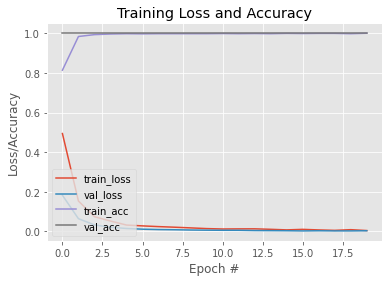

In [51]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(mainPath + "plot")